In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sample_df_no_feature_engg=pd.read_csv('smoking_driking_dataset_sampled.csv')

In [5]:
sample_df_no_feature_engg.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [394]:
sample_df_no_feature_engg.shape

(100000, 24)

In [34]:
# EDA of no feature engineered data

In [148]:
# smokers and non smokers
sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3]).value_counts()

SMK_stat_type_cd
False    60773
True     39227
Name: count, dtype: int64

In [152]:
# no of drinkers and non drinkers
sample_df_no_feature_engg['DRK_YN'].value_counts()

DRK_YN
Y    50190
N    49810
Name: count, dtype: int64

In [396]:
# no of male and female 

<Axes: xlabel='sex'>

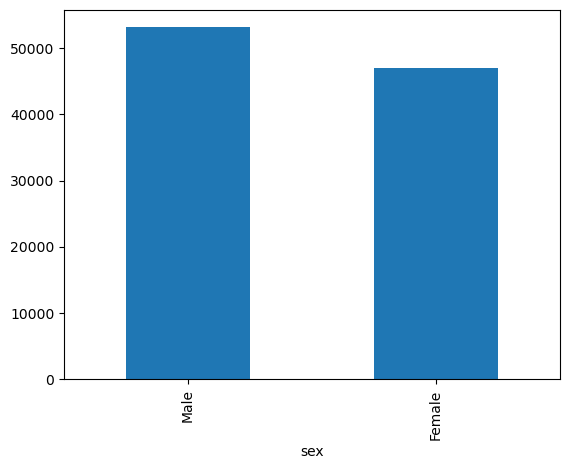

In [64]:

sample_df_no_feature_engg['sex'].value_counts().plot(kind= 'bar')

In [74]:
total_gender_counts = sample_df_no_feature_engg['sex'].value_counts()
total_gender_counts

sex
Male      53092
Female    46908
Name: count, dtype: int64

In [ ]:
# smoking and gender distribution

In [162]:
# Number of smokers by gender
smoker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['sex'].value_counts()
smoker_counts
# print(smoker_counts.sum())

sex
Male      36482
Female     2745
Name: count, dtype: int64

In [88]:
# Number of non smokers by gender
non_smoker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['sex'].value_counts()
non_smoker_counts

sex
Female    44163
Male      16610
Name: count, dtype: int64

Percentage of male smokers: 68.71%
Percentage of female smokers: 5.85%


Text(0.5, 1.0, 'Percentage of Smokers Among Male and Female')

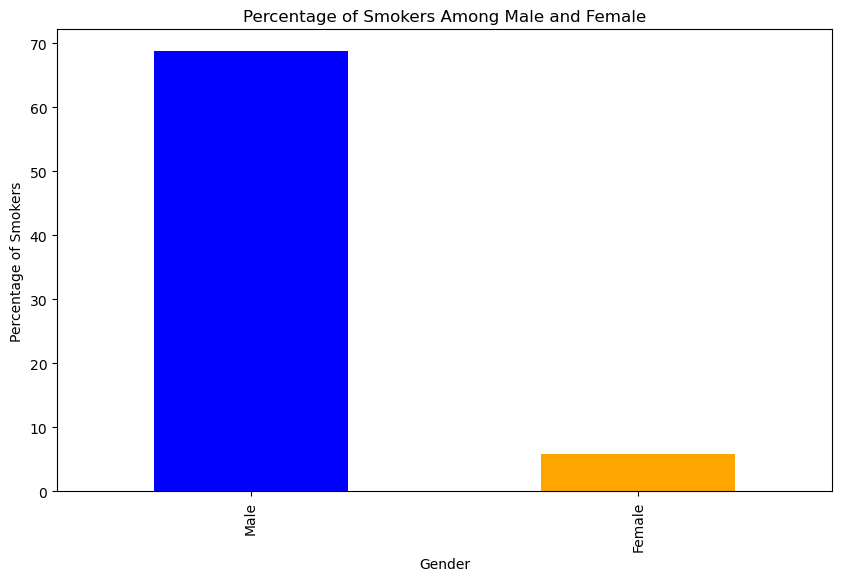

In [92]:

# Calculating the percentage of smokers within each gender group
smoker_percentage = (smoker_counts / total_gender_counts) * 100

# Printing the percentages
print(f"Percentage of male smokers: {smoker_percentage['Male']:.2f}%")
print(f"Percentage of female smokers: {smoker_percentage['Female']:.2f}%")

# Plotting the bar plot for percentage distribution
plt.figure(figsize=(10, 6))
smoker_percentage.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers Among Male and Female')

sex
Male      36482
Female     2745
Name: count, dtype: int64


<Axes: xlabel='sex'>

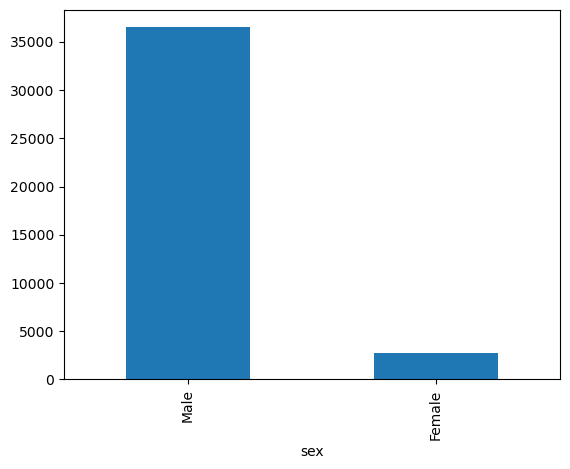

In [82]:
# genders who smoke and the distribution of smokers between male and female
smoker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]['sex'].value_counts()
print(smoker_counts)
# Plotting the bar plot
smoker_counts.plot(kind='bar')

sex
Female    44163
Male      16610
Name: count, dtype: int64


<Axes: xlabel='sex'>

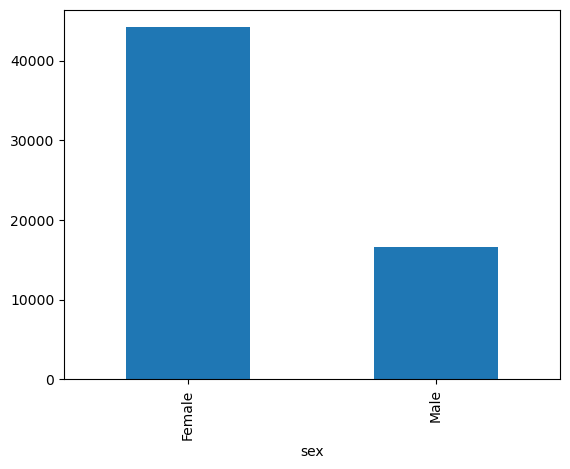

In [60]:
# genders who dont smoke and the distribution of non-smokers between male and female
non_smoker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['sex'].value_counts()
print(non_smoker_counts)
# Plotting the bar plot
non_smoker_counts.plot(kind='bar')

In [ ]:
# smoking y and drinkin y or n, smking no and drinking y or n distribution

DRK_YN
N    39091
Y    21682
Name: count, dtype: int64


<Axes: xlabel='DRK_YN'>

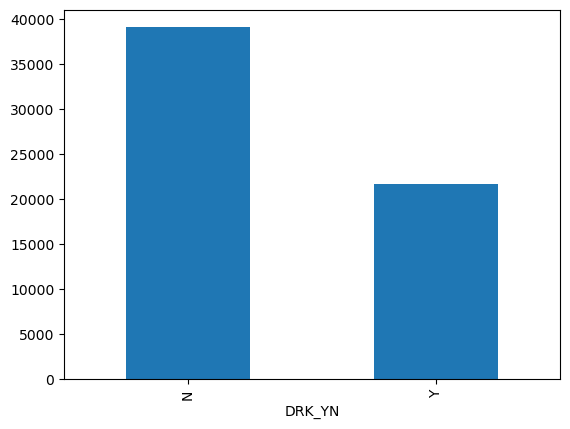

In [58]:
# distribution of people who dont smoke and whether they drink or not
no_smoker_counts_drink = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['DRK_YN'].value_counts()
print(no_smoker_counts_drink)
# Plotting the bar plot
no_smoker_counts_drink.plot(kind='bar')

DRK_YN
Y    28508
N    10719
Name: count, dtype: int64


<Axes: xlabel='DRK_YN'>

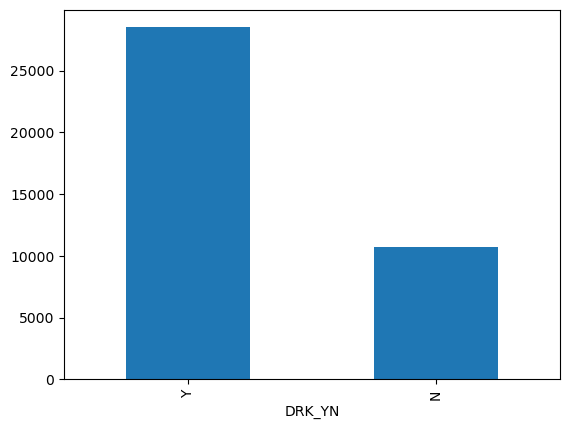

In [56]:
# distribution of people who  smoke and whether they drink or not
smoker_counts_drink = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]['DRK_YN'].value_counts()
print(smoker_counts_drink)
# Plotting the bar plot
smoker_counts_drink.plot(kind='bar')

In [ ]:
# smoking and cholestrol

In [ ]:
# there are lot of outliers in the distributuion of total cholestrol values

<Axes: >

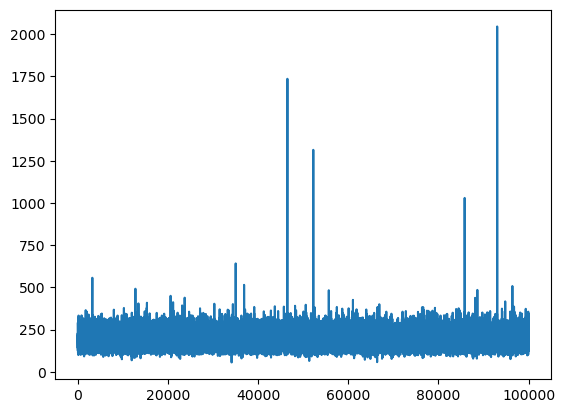

In [144]:
sample_df_no_feature_engg['tot_chole'].plot(kind = 'line')

<Axes: >

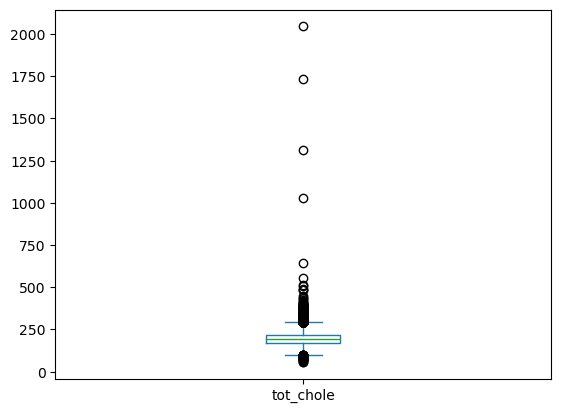

In [140]:
sample_df_no_feature_engg['tot_chole'].plot(kind = 'box')

In [136]:
sample_df_no_feature_engg['tot_chole'].describe()

count    100000.000000
mean        195.562250
std          38.839053
min          55.000000
25%         170.000000
50%         193.000000
75%         219.000000
max        2046.000000
Name: tot_chole, dtype: float64

2046.0


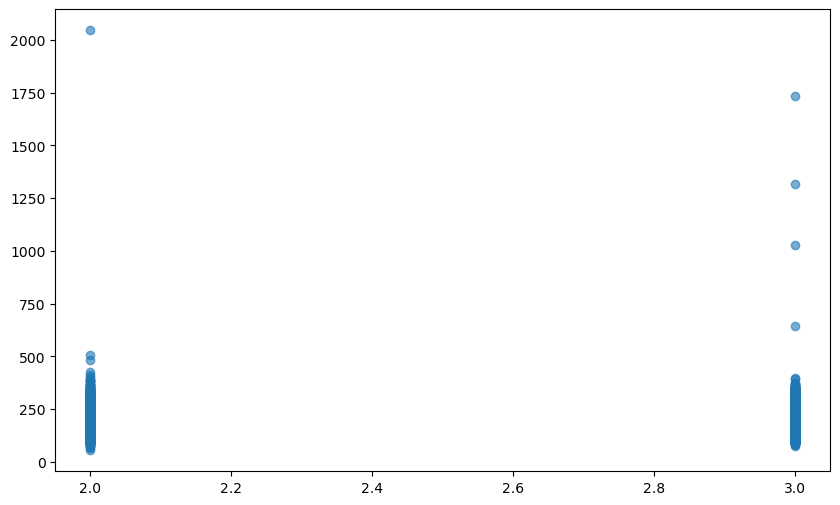

In [130]:
# distribution of people who smoke and their cholestrol distribution level
smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]
print(smoker_cholestrol['tot_chole'].max())
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(smoker_cholestrol['SMK_stat_type_cd'], smoker_cholestrol['tot_chole'], alpha=0.6)


557.0


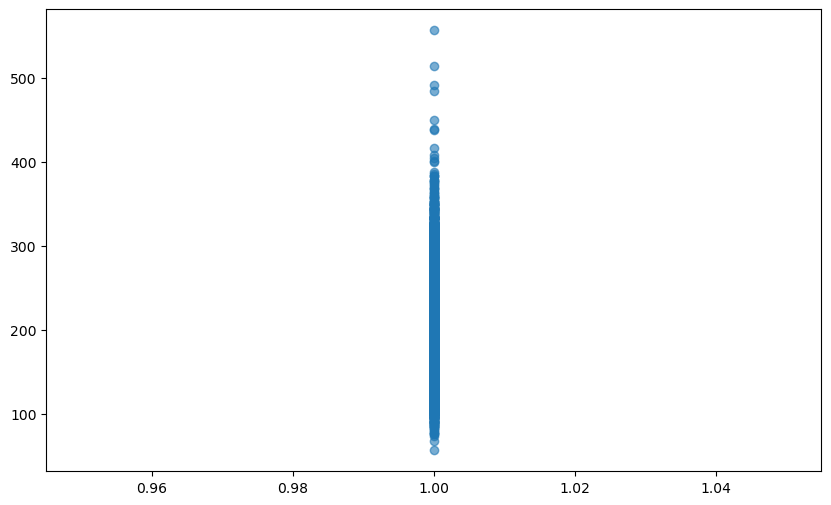

In [180]:
# distribution of people who smoke and their cholestrol distribution level
non_smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]
# Plotting the scatter plot
print(non_smoker_cholestrol['tot_chole'].max())
plt.figure(figsize=(10, 6))
plt.scatter(non_smoker_cholestrol['SMK_stat_type_cd'], non_smoker_cholestrol['tot_chole'], alpha=0.6)


<Axes: ylabel='Frequency'>

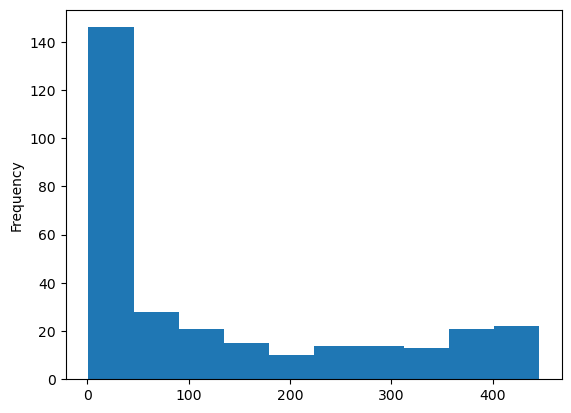

In [150]:
non_smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]['tot_chole'].value_counts().sort_index()

# Plotting the line plot
non_smoker_cholestrol.plot(kind='hist')

<Axes: ylabel='Frequency'>

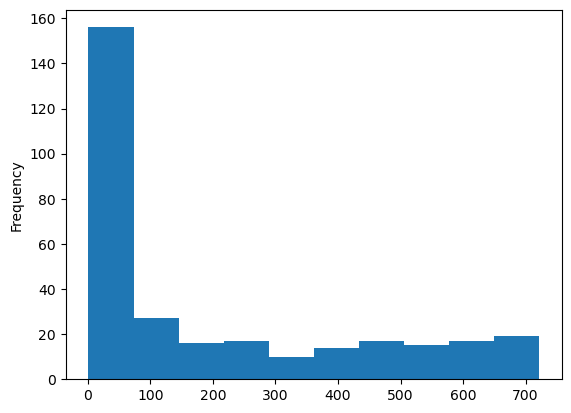

In [110]:
# distribution of people who dont smoke and their cholestrol distribution level
non_smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['tot_chole'].value_counts().sort_index()

# Plotting the line plot
non_smoker_cholestrol.plot(kind='hist')

In [198]:
print(sample_df_no_feature_engg['tot_chole'].max())
print(sample_df_no_feature_engg['tot_chole'].min())

2046.0
55.0


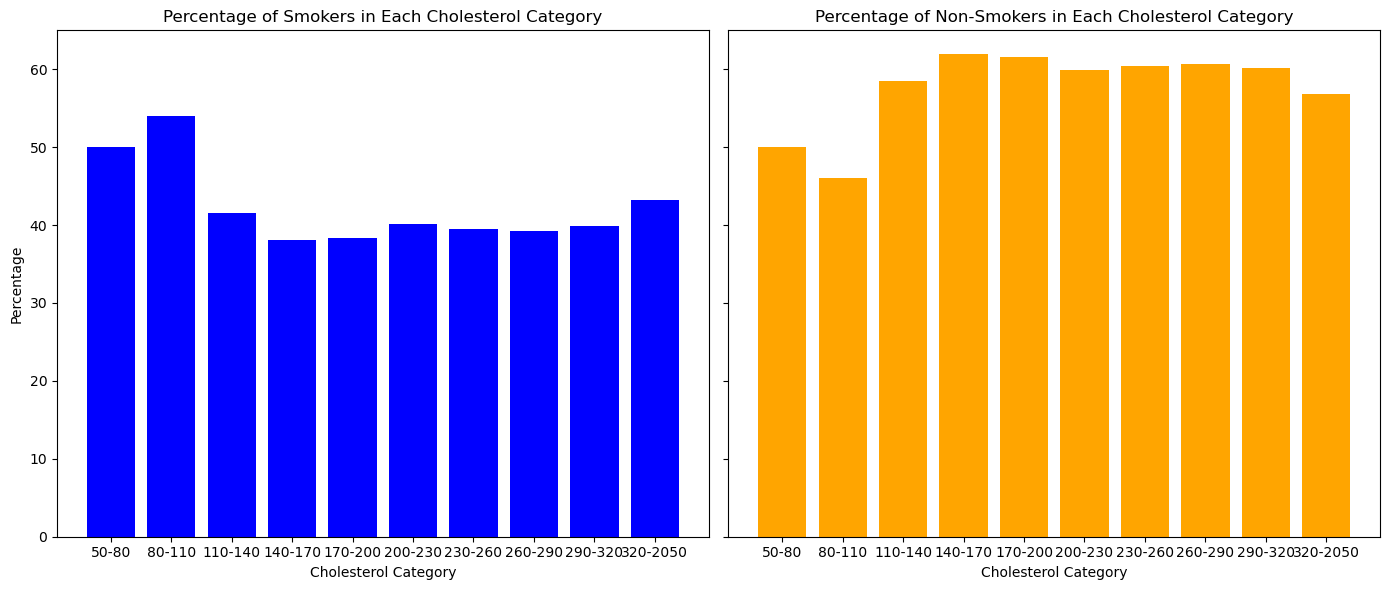

In [398]:
# Define cholesterol categories
bins = [50, 80, 110, 140, 170, 200, 230, 260, 290, 310, 2046]
labels = ['50-80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-290', '290-320', '320-2050']
sample_df_no_feature_engg['chole_category'] = pd.cut(sample_df_no_feature_engg['tot_chole'], bins=bins, labels=labels)

# Total number of people in each cholesterol category
total_counts = sample_df_no_feature_engg['chole_category'].value_counts(sort=False)

# Number of smokers in each cholesterol category
smoker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['chole_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each cholesterol category
percentage_smoker_chole = (smoker_counts_chole / total_counts) * 100

# Number of non-smokers in each cholesterol category
non_smoker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['chole_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each cholesterol category
percentage_non_smoker_chole = (non_smoker_counts_chole / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages
axs[0].bar(percentage_smoker_chole.index, percentage_smoker_chole, color='blue')
axs[0].set_title('Percentage of Smokers in Each Cholesterol Category')
axs[0].set_xlabel('Cholesterol Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages
axs[1].bar(percentage_non_smoker_chole.index, percentage_non_smoker_chole, color='orange')
axs[1].set_title('Percentage of Non-Smokers in Each Cholesterol Category')
axs[1].set_xlabel('Cholesterol Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# smokers urine protein levels

In [170]:
print(smoker_counts.sum())

39227


In [168]:
print(non_smoker_counts.sum())

60773


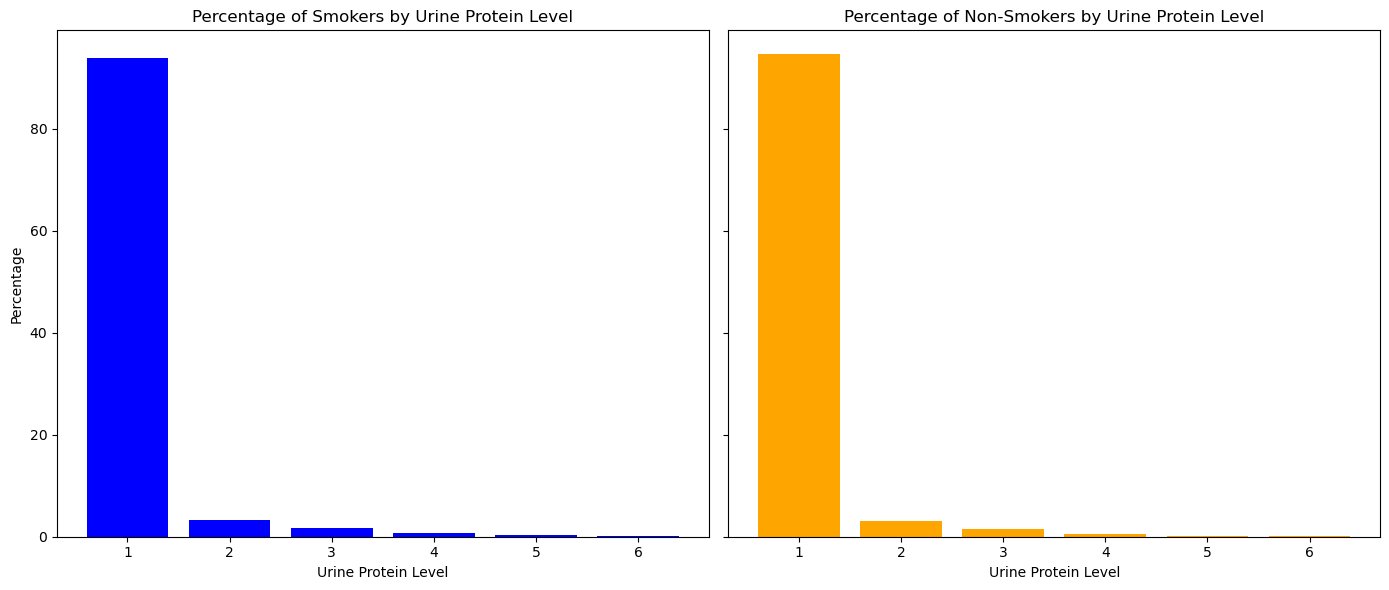

In [400]:
# Distribution of smokers by protein levels
smoker_counts_protein = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['urine_protein'].value_counts()
smoker_counts_protein_percentage = (smoker_counts_protein / smoker_counts_protein.sum()) * 100

# Distribution of non-smokers by protein levels
non_smoker_counts_protein = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['urine_protein'].value_counts()
non_smoker_counts_protein_percentage = (non_smoker_counts_protein / non_smoker_counts_protein.sum()) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages by protein levels
axs[0].bar(smoker_counts_protein_percentage.index, smoker_counts_protein_percentage, color='blue')
axs[0].set_title('Percentage of Smokers by Urine Protein Level')
axs[0].set_xlabel('Urine Protein Level')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages by protein levels
axs[1].bar(non_smoker_counts_protein_percentage.index, non_smoker_counts_protein_percentage, color='orange')
axs[1].set_title('Percentage of Non-Smokers by Urine Protein Level')
axs[1].set_xlabel('Urine Protein Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [402]:
print(non_smoker_counts_protein)

urine_protein
1.0    57491
2.0     1874
3.0      919
4.0      363
5.0       99
6.0       27
Name: count, dtype: int64


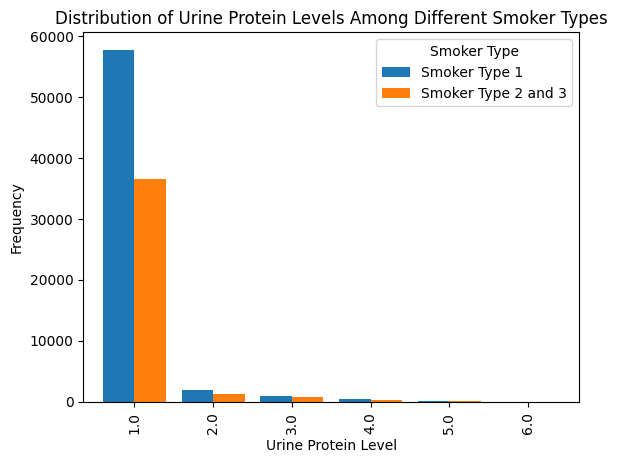

In [ ]:
# Counting the occurrences of urine protein levels for SMK_stat_type_cd == 1
protein_counts_non_smoker1 = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['urine_protein'].value_counts().sort_index()

# Counting the occurrences of urine protein levels for SMK_stat_type_cd in [2, 3]
protein_counts_smoker2_3 = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['urine_protein'].value_counts().sort_index()

# Creating a DataFrame for easy plotting
protein_counts_df = pd.DataFrame({
    'Smoker Type 1': protein_counts_non_smoker1,
    'Smoker Type 2 and 3': protein_counts_smoker2_3
}).fillna(0)  # Fill NaN with 0 for missing values

# Plotting the grouped bar chart
protein_counts_df.plot(kind='bar', width=0.8)

# Adding labels and title
plt.xlabel('Urine Protein Level')
plt.ylabel('Frequency')
plt.title('Distribution of Urine Protein Levels Among Different Smoker Types')
plt.legend(title='Smoker Type')

# Display the plot
plt.show()

In [ ]:
# age and smokers

<Axes: xlabel='age'>

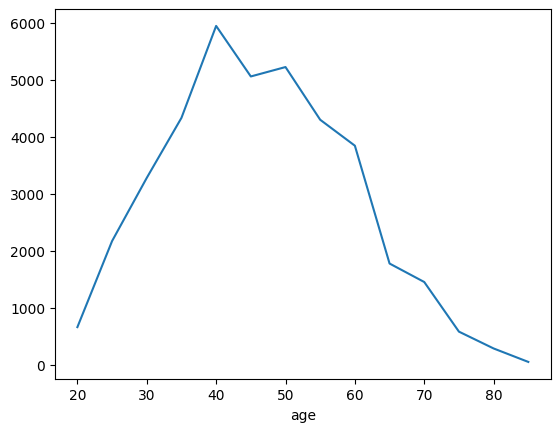

In [ ]:
# distribution of people who smoke and their age distribution level
smoker_age = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]['age'].value_counts().sort_index()

# Plotting the line plot
smoker_age.plot(kind='line')

<Axes: xlabel='age'>

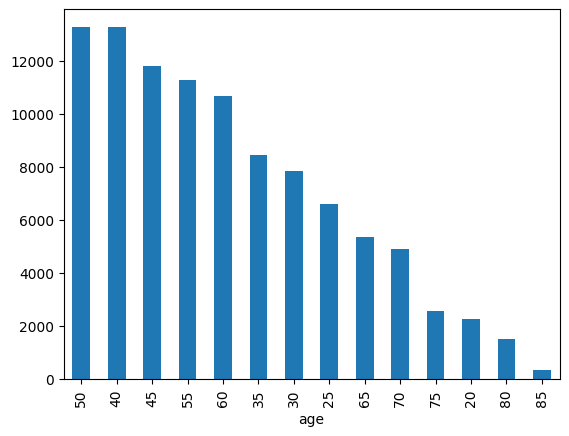

In [ ]:
sample_df_no_feature_engg['age'].value_counts().plot(kind='bar')

age_category
20-29    14420
30-39    21686
40-49    25079
50-59    21937
60-69    10228
70-79     4056
Name: count, dtype: int64


<Axes: xlabel='age_category'>

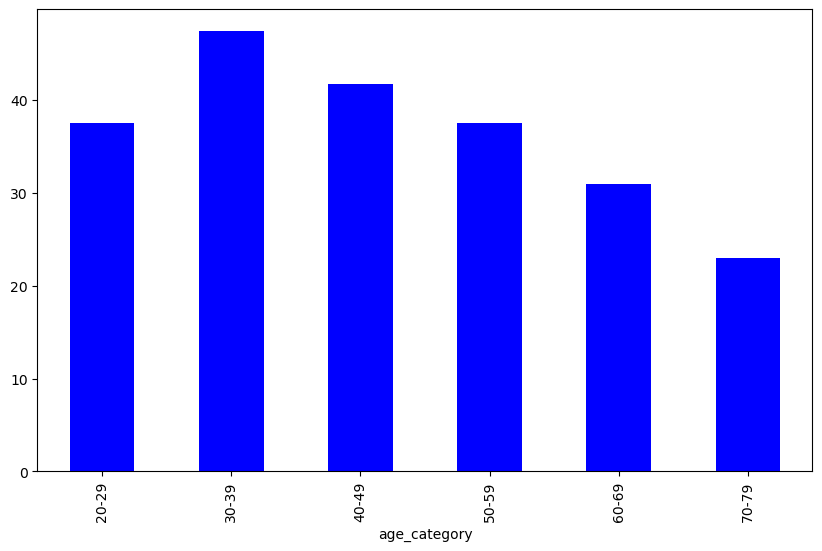

In [176]:
# Define age categories
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sample_df_no_feature_engg['age_category'] = pd.cut(sample_df_no_feature_engg['age'], bins=bins, labels=labels)

# Total number of people in each age category
total_counts = sample_df_no_feature_engg['age_category'].value_counts(sort=False)
print(total_counts)
# Number of smokers in each age category
smoker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['age_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each age category
percentage_smokers = (smoker_counts / total_counts) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
percentage_smokers.plot(kind='bar', color='blue')

<Axes: xlabel='SMK_stat_type_cd', ylabel='age'>

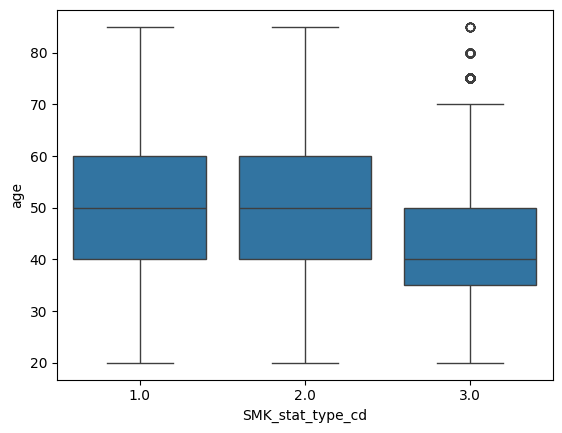

In [ ]:
sns.boxplot(data =sample_df_no_feature_engg, x =sample_df_no_feature_engg['SMK_stat_type_cd'] , y ='age'  )

In [ ]:
# SBP

<Axes: >

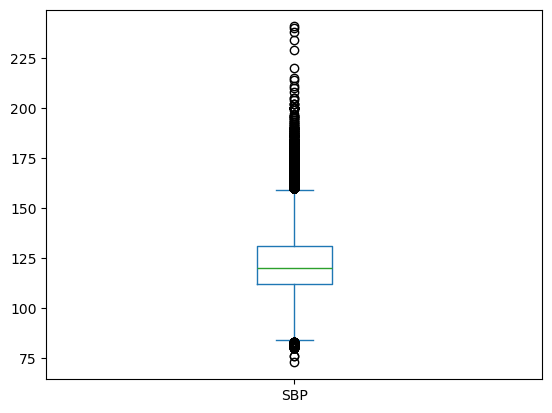

In [344]:
sample_df_no_feature_engg['SBP'].plot(kind = 'box')

In [186]:
print(sample_df_no_feature_engg['SBP'].min())
print(sample_df_no_feature_engg['SBP'].max())

73.0
241.0


234.0


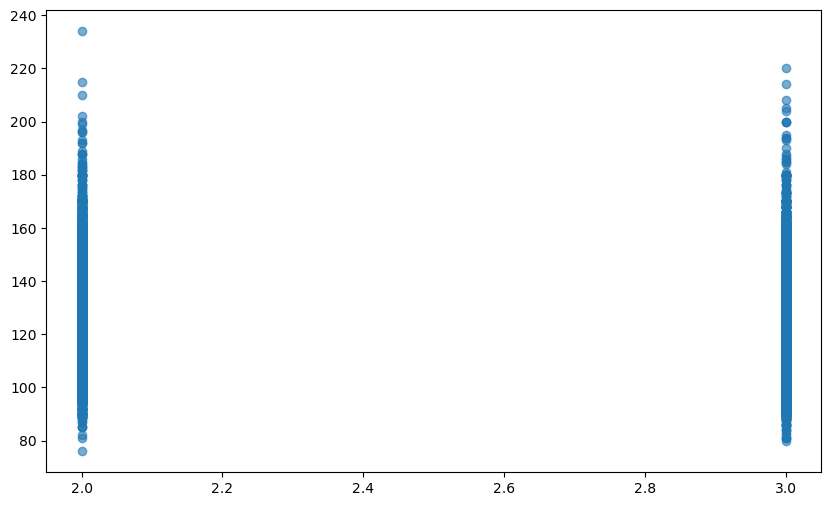

In [178]:
# distribution of people who smoke and their cholestrol distribution level
smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2,3])]
print(smoker_cholestrol['SBP'].max())
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(smoker_cholestrol['SMK_stat_type_cd'], smoker_cholestrol['SBP'], alpha=0.6)


In [406]:
print(total_counts)

SBP_category
70-100      6879
100-130    67668
130-160    24405
160-190      999
190-220       44
220-250        5
Name: count, dtype: int64


241.0


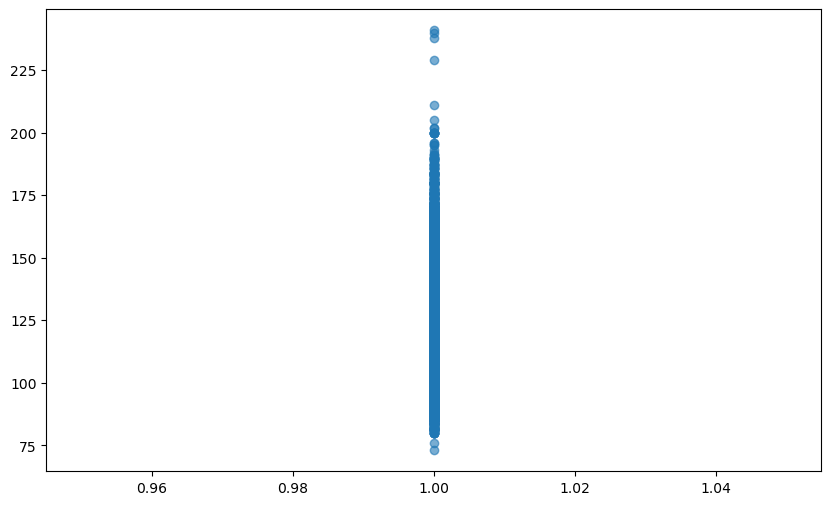

In [182]:
# distribution of people who smoke and their cholestrol distribution level
non_smoker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]
# Plotting the scatter plot
print(non_smoker_cholestrol['SBP'].max())
plt.figure(figsize=(10, 6))
plt.scatter(non_smoker_cholestrol['SMK_stat_type_cd'], non_smoker_cholestrol['SBP'], alpha=0.6)


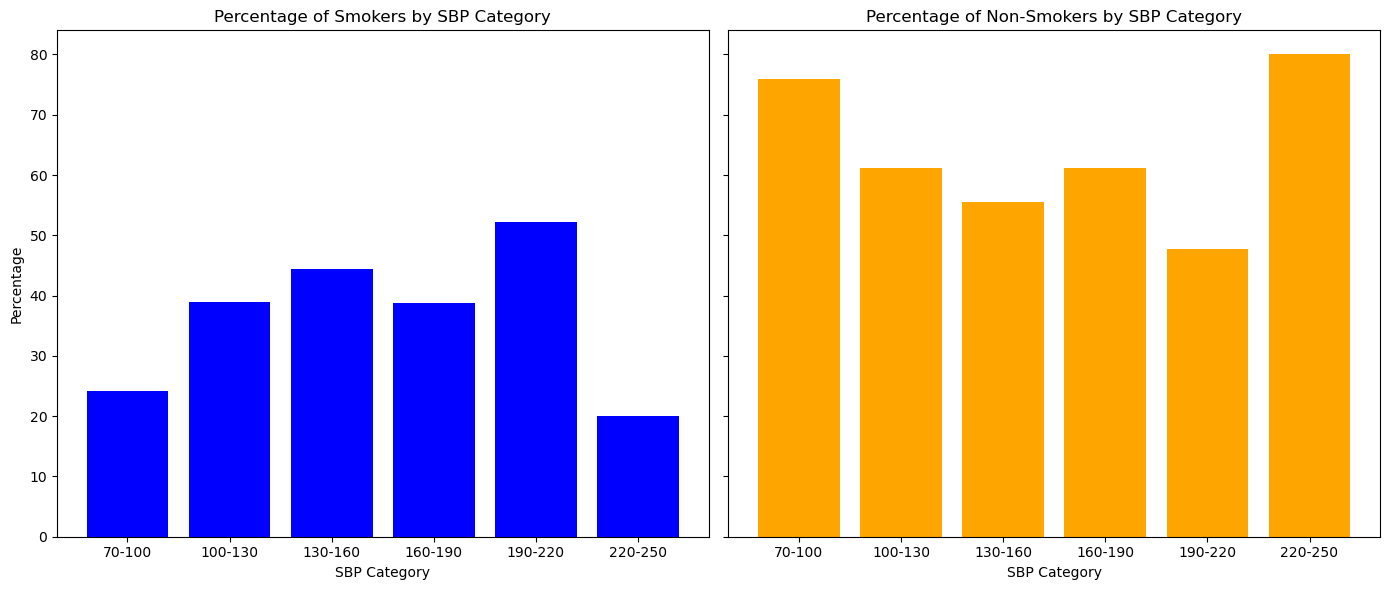

In [404]:
# Define SBP categories
bins = [70, 100, 130, 160, 190, 220, 250]
labels = ['70-100', '100-130', '130-160', '160-190', '190-220', '220-250']
sample_df_no_feature_engg['SBP_category'] = pd.cut(sample_df_no_feature_engg['SBP'], bins=bins, labels=labels)

# Total number of people in each SBP category
total_counts = sample_df_no_feature_engg['SBP_category'].value_counts(sort=False)

# Number of smokers in each SBP category
smoker_counts_sbp = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['SBP_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each SBP category
percentage_sbp_smokers = (smoker_counts_sbp / total_counts) * 100

# Number of non-smokers in each SBP category
non_smoker_counts_sbp = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['SBP_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each SBP category
percentage_sbp_non_smokers = (non_smoker_counts_sbp / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages
axs[0].bar(percentage_sbp_smokers.index, percentage_sbp_smokers, color='blue')
axs[0].set_title('Percentage of Smokers by SBP Category')
axs[0].set_xlabel('SBP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages
axs[1].bar(percentage_sbp_non_smokers.index, percentage_sbp_non_smokers, color='orange')
axs[1].set_title('Percentage of Non-Smokers by SBP Category')
axs[1].set_xlabel('SBP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# DBP

In [204]:
print(sample_df_no_feature_engg['DBP'].min())
print(sample_df_no_feature_engg['DBP'].max())

36.0
163.0


<Axes: >

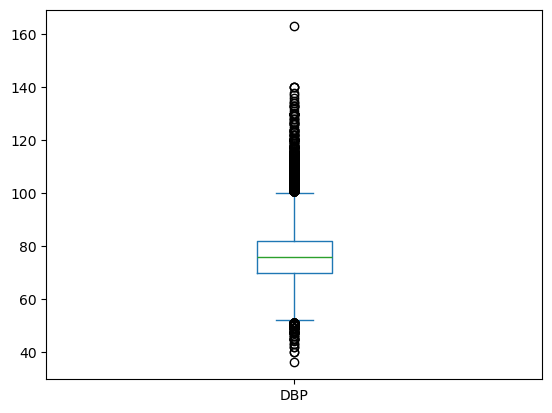

In [212]:
sample_df_no_feature_engg['DBP'].plot(kind = 'box')

In [410]:
print(total_counts)

DBP_category
30-60       6710
60-90      87755
90-120      5478
120-150       56
150-180        1
Name: count, dtype: int64


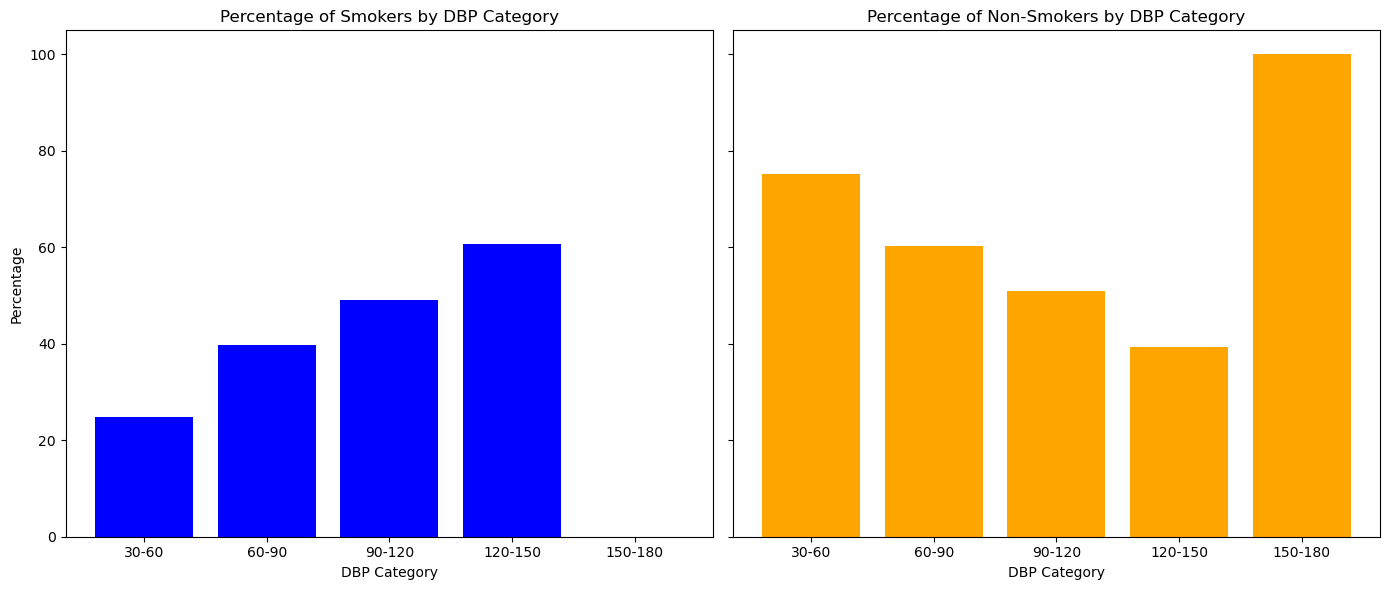

In [408]:

# Define DBP categories
bins = [30, 60, 90, 120, 150, 180]
labels = ['30-60', '60-90', '90-120', '120-150', '150-180']
sample_df_no_feature_engg['DBP_category'] = pd.cut(sample_df_no_feature_engg['DBP'], bins=bins, labels=labels)

# Total number of people in each DBP category
total_counts = sample_df_no_feature_engg['DBP_category'].value_counts(sort=False)

# Number of smokers in each DBP category
smoker_counts_dbp = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['DBP_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each DBP category
percentage_smoker_dbp = (smoker_counts_dbp / total_counts) * 100

# Number of non-smokers in each DBP category
non_smoker_counts_dbp = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['DBP_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each DBP category
percentage_non_smoker_dbp = (non_smoker_counts_dbp / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages
axs[0].bar(percentage_smoker_dbp.index, percentage_smoker_dbp, color='blue')
axs[0].set_title('Percentage of Smokers by DBP Category')
axs[0].set_xlabel('DBP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages
axs[1].bar(percentage_non_smoker_dbp.index, percentage_non_smoker_dbp, color='orange')
axs[1].set_title('Percentage of Non-Smokers by DBP Category')
axs[1].set_xlabel('DBP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# HDL

In [216]:
print(sample_df_no_feature_engg['HDL_chole'].min())
print(sample_df_no_feature_engg['HDL_chole'].max())

1.0
618.0


<Axes: >

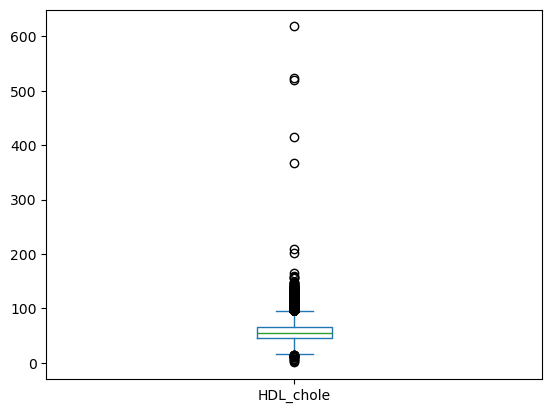

In [220]:
sample_df_no_feature_engg['HDL_chole'].plot(kind = 'box')

In [414]:
print(total_counts)

HDL_category
0-100      99066
100-200      927
200-300        2
300-400        1
400-500        1
500-600        2
600-700        1
Name: count, dtype: int64


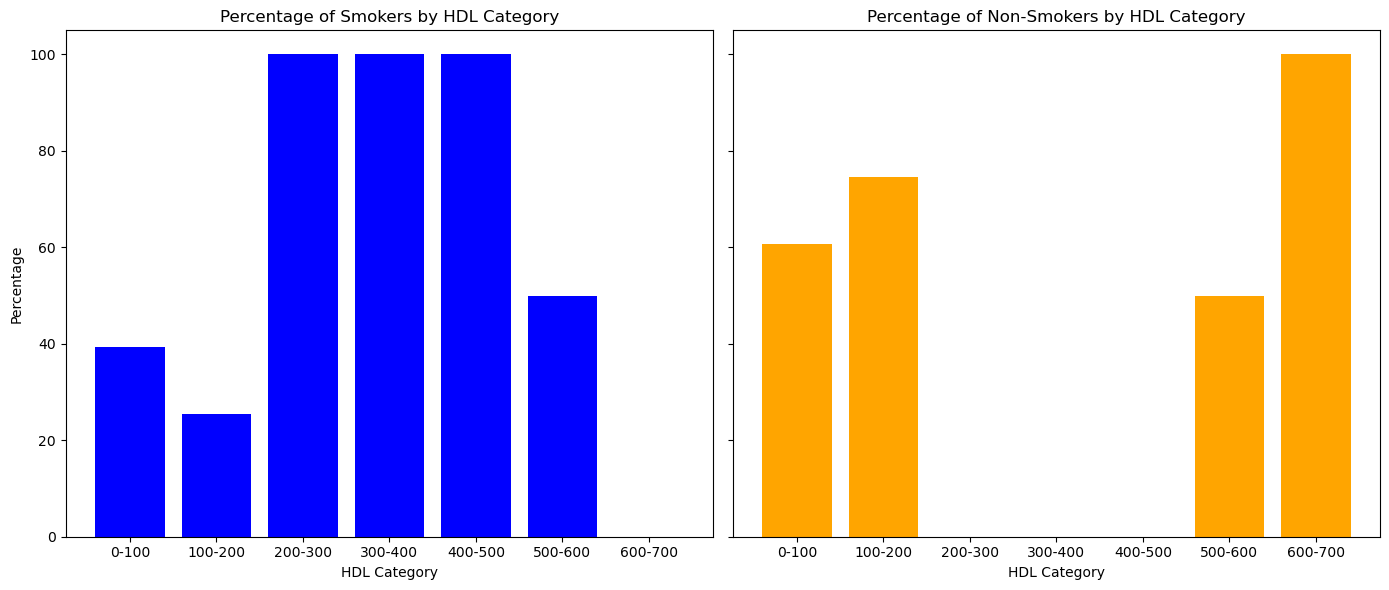

In [412]:
# Define HDL cholesterol categories
bins = [0, 100, 200, 300, 400, 500, 600, 700]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700']
sample_df_no_feature_engg['HDL_category'] = pd.cut(sample_df_no_feature_engg['HDL_chole'], bins=bins, labels=labels)

# Total number of people in each HDL category
total_counts = sample_df_no_feature_engg['HDL_category'].value_counts(sort=False)

# Number of smokers in each HDL category
smoker_counts_hdl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['HDL_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each HDL category
percentage_smoker_hdl = (smoker_counts_hdl / total_counts) * 100

# Number of non-smokers in each HDL category
non_smoker_counts_hdl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['HDL_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each HDL category
percentage_non_smoker_hdl = (non_smoker_counts_hdl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages by HDL category
axs[0].bar(percentage_smoker_hdl.index, percentage_smoker_hdl, color='blue')
axs[0].set_title('Percentage of Smokers by HDL Category')
axs[0].set_xlabel('HDL Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages by HDL category
axs[1].bar(percentage_non_smoker_hdl.index, percentage_non_smoker_hdl, color='orange')
axs[1].set_title('Percentage of Non-Smokers by HDL Category')
axs[1].set_xlabel('HDL Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# LDL

In [226]:
print(sample_df_no_feature_engg['LDL_chole'].min())
print(sample_df_no_feature_engg['LDL_chole'].max())

1.0
2111.0


<Axes: >

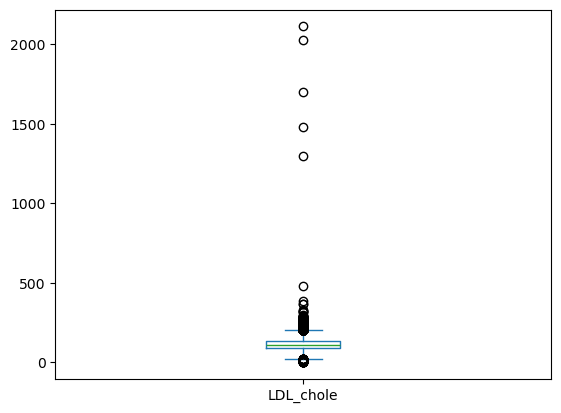

In [228]:
sample_df_no_feature_engg['LDL_chole'].plot(kind = 'box')

In [418]:
print(total_counts)

LDL_category
0-100       37608
100-200     61290
200-300      1088
300-400         8
400-500         1
500-600         0
600-700         0
700-800         0
800-900         0
900-2111        5
Name: count, dtype: int64


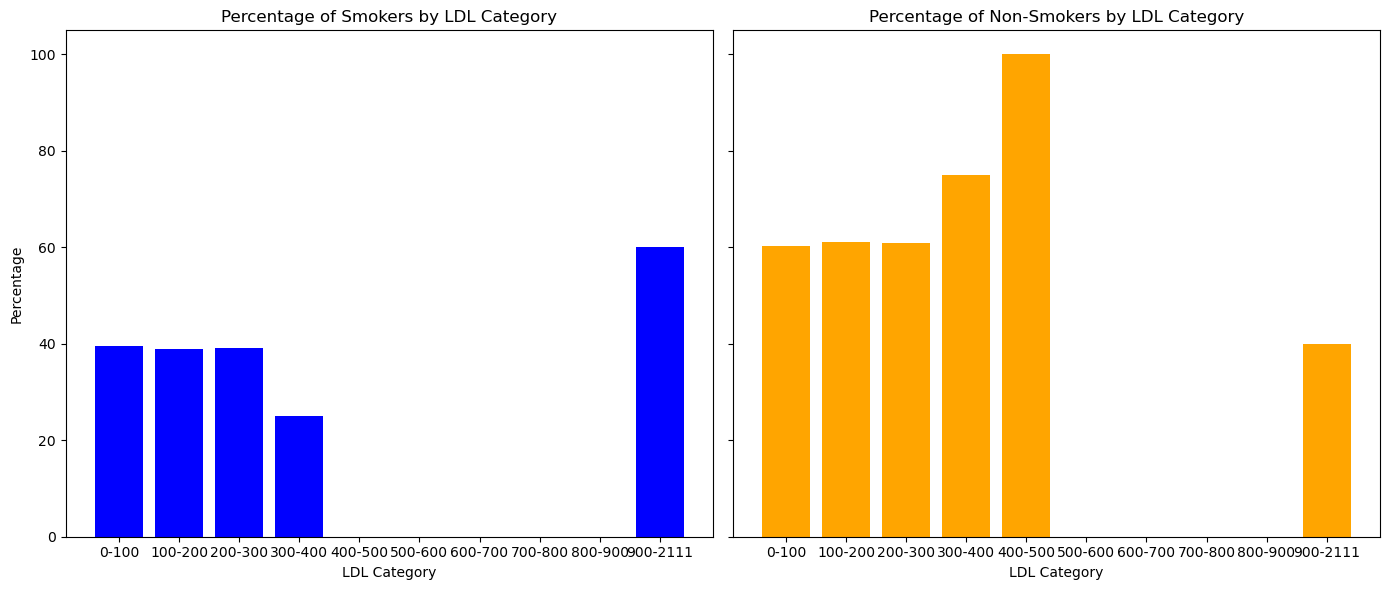

In [416]:
# Define LDL cholesterol categories
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 2111]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-2111']
sample_df_no_feature_engg['LDL_category'] = pd.cut(sample_df_no_feature_engg['LDL_chole'], bins=bins, labels=labels)

# Total number of people in each LDL category
total_counts = sample_df_no_feature_engg['LDL_category'].value_counts(sort=False)

# Number of smokers in each LDL category
smoker_counts_ldl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['LDL_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each LDL category
percentage_smoker_ldl = (smoker_counts_ldl / total_counts) * 100

# Number of non-smokers in each LDL category
non_smoker_counts_ldl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['LDL_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each LDL category
percentage_non_smoker_ldl = (non_smoker_counts_ldl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages by LDL category
axs[0].bar(percentage_smoker_ldl.index, percentage_smoker_ldl, color='blue')
axs[0].set_title('Percentage of Smokers by LDL Category')
axs[0].set_xlabel('LDL Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages by LDL category
axs[1].bar(percentage_non_smoker_ldl.index, percentage_non_smoker_ldl, color='orange')
axs[1].set_title('Percentage of Non-Smokers by LDL Category')
axs[1].set_xlabel('LDL Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# triglycerides

In [236]:
print(sample_df_no_feature_engg['triglyceride'].min())
print(sample_df_no_feature_engg['triglyceride'].max())

6.0
6430.0


<Axes: >

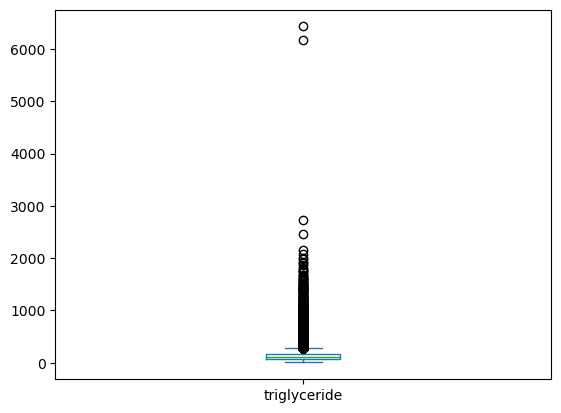

In [238]:
sample_df_no_feature_engg['triglyceride'].plot(kind = 'box')

In [422]:
print(total_counts)

tgl_category
0-200        85170
200-400      12939
400-600       1346
600-800        312
800-1000       112
1000-7000      121
Name: count, dtype: int64


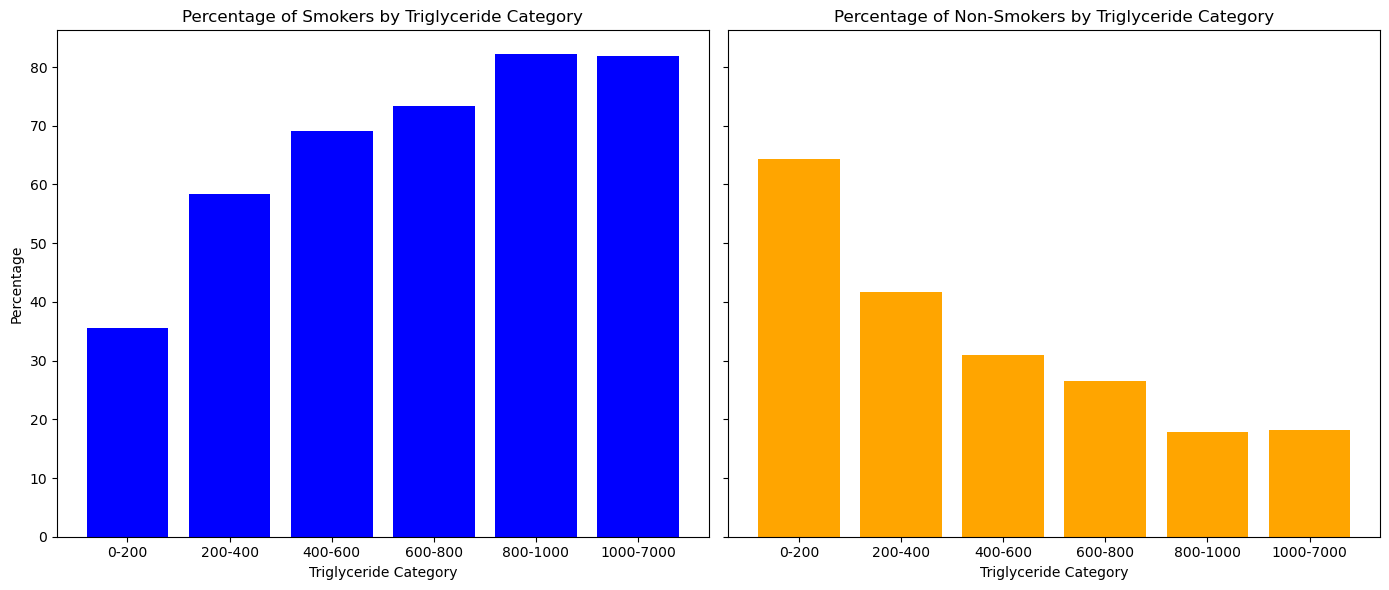

In [420]:

# Define triglyceride categories
bins = [0, 200, 400, 600, 800, 1000, 7000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-7000']
sample_df_no_feature_engg['tgl_category'] = pd.cut(sample_df_no_feature_engg['triglyceride'], bins=bins, labels=labels)

# Total number of people in each triglyceride category
total_counts = sample_df_no_feature_engg['tgl_category'].value_counts(sort=False)

# Number of smokers in each triglyceride category
smoker_counts_tgl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['tgl_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each triglyceride category
percentage_smoker_tgl = (smoker_counts_tgl / total_counts) * 100

# Number of non-smokers in each triglyceride category
non_smoker_counts_tgl = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['tgl_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each triglyceride category
percentage_non_smoker_tgl = (non_smoker_counts_tgl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages by triglyceride category
axs[0].bar(percentage_smoker_tgl.index, percentage_smoker_tgl, color='blue')
axs[0].set_title('Percentage of Smokers by Triglyceride Category')
axs[0].set_xlabel('Triglyceride Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages by triglyceride category
axs[1].bar(percentage_non_smoker_tgl.index, percentage_non_smoker_tgl, color='orange')
axs[1].set_title('Percentage of Non-Smokers by Triglyceride Category')
axs[1].set_xlabel('Triglyceride Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
#  gamma gtp

In [246]:
print(sample_df_no_feature_engg['gamma_GTP'].min())
print(sample_df_no_feature_engg['gamma_GTP'].max())

1.0
999.0


<Axes: >

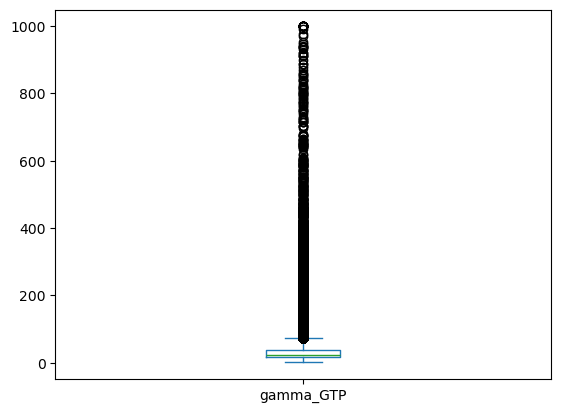

In [248]:
sample_df_no_feature_engg['gamma_GTP'].plot(kind = 'box')

In [426]:
print(total_counts)

gamma_GTP_category
0-50        82631
50-100      11970
100-200      4094
200-300       730
300-400       260
400-500       129
500-600        68
600-700        32
700-800        29
800-900        23
900-1000       34
Name: count, dtype: int64


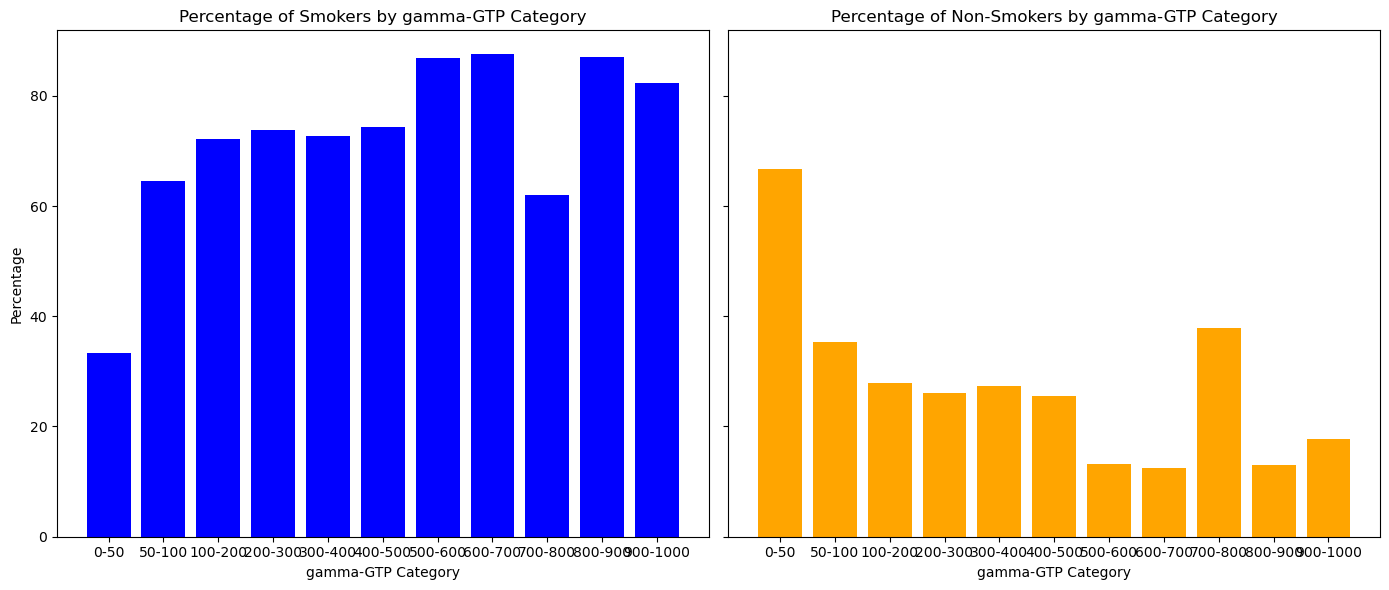

In [424]:

# Define gamma-GTP categories
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']
sample_df_no_feature_engg['gamma_GTP_category'] = pd.cut(sample_df_no_feature_engg['gamma_GTP'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df_no_feature_engg['gamma_GTP_category'].value_counts(sort=False)

# Number of smokers in each gamma-GTP category
smoker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each gamma-GTP category
percentage_smoker_gamma = (smoker_counts_gamma / total_counts) * 100

# Number of non-smokers in each gamma-GTP category
non_smoker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of non-smokers within each gamma-GTP category
percentage_non_smoker_gamma = (non_smoker_counts_gamma / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the smoker percentages by gamma-GTP category
axs[0].bar(percentage_smoker_gamma.index, percentage_smoker_gamma, color='blue')
axs[0].set_title('Percentage of Smokers by gamma-GTP Category')
axs[0].set_xlabel('gamma-GTP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-smoker percentages by gamma-GTP category
axs[1].bar(percentage_non_smoker_gamma.index, percentage_non_smoker_gamma, color='orange')
axs[1].set_title('Percentage of Non-Smokers by gamma-GTP Category')
axs[1].set_xlabel('gamma-GTP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# hemoglobin and smokers

<Axes: >

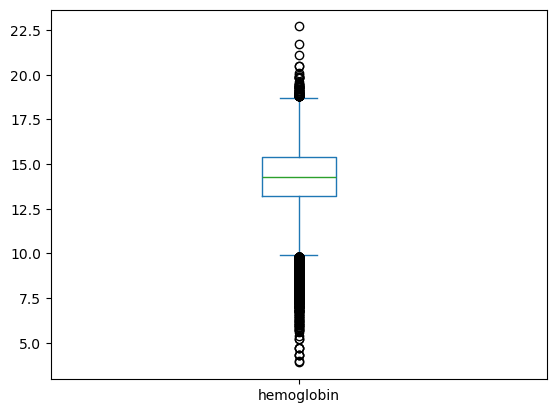

In [17]:
sample_df_no_feature_engg['hemoglobin'].plot(kind = 'box')

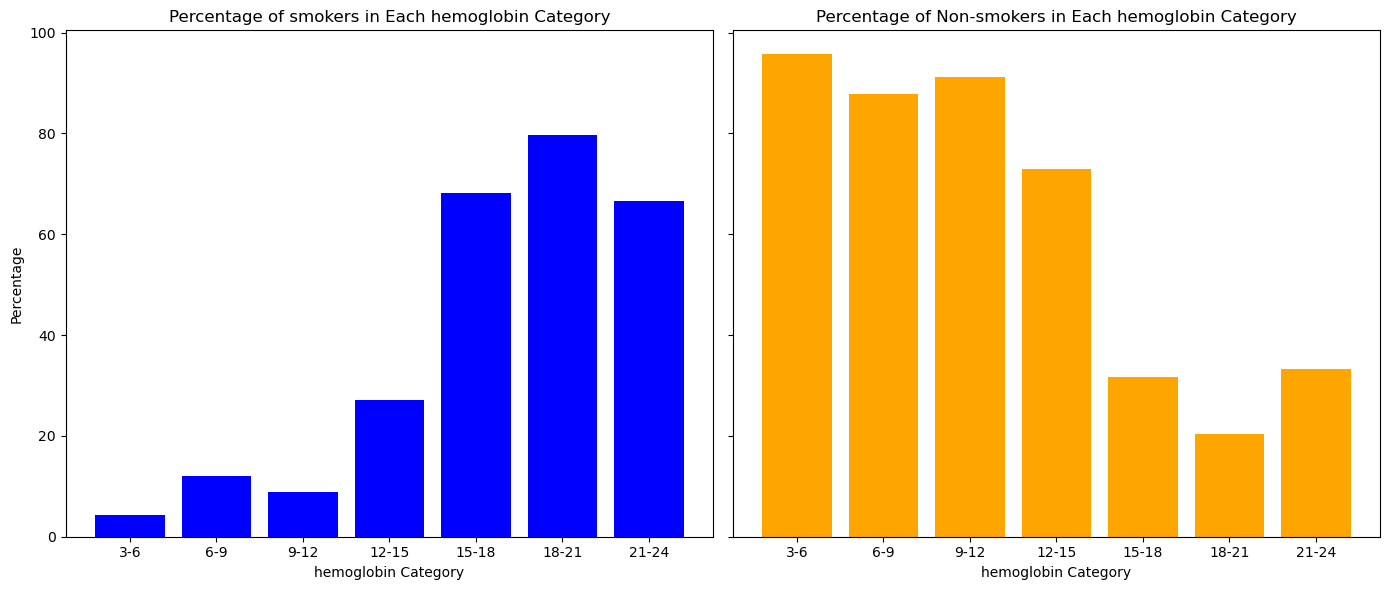

In [15]:
# Define hemoglobin categories
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
sample_df_no_feature_engg['hemoglobin_category'] = pd.cut(sample_df_no_feature_engg['hemoglobin'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df_no_feature_engg['hemoglobin_category'].value_counts(sort=False)

# Number of drinkers in each gamma-GTP category
smokers_counts_hemo = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([2, 3])]['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each gamma-GTP category
smoker_percentage_hemo = (smokers_counts_hemo / total_counts) * 100

# Number of non-drinkers in each gamma-GTP category
non_smoker_counts_hemo = sample_df_no_feature_engg[sample_df_no_feature_engg['SMK_stat_type_cd'].isin([1])]['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each gamma-GTP category
non_smoker_percentage_hemo = (non_smoker_counts_hemo / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(smoker_percentage_hemo.index, smoker_percentage_hemo, color='blue')
axs[0].set_title('Percentage of smokers in Each hemoglobin Category')
axs[0].set_xlabel('hemoglobin Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_smoker_percentage_hemo.index, non_smoker_percentage_hemo, color='orange')
axs[1].set_title('Percentage of Non-smokers in Each hemoglobin Category')
axs[1].set_xlabel('hemoglobin Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [258]:
sample_df_no_feature_engg['DRK_YN'] = sample_df_no_feature_engg['DRK_YN'].astype('category')
# Create age groups
sample_df_no_feature_engg['age_group'] = pd.cut(sample_df_no_feature_engg['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
# 1. Mean Values of Health Metrics by Sex and Drinking Status
pivot_table1 = sample_df_no_feature_engg.pivot_table(
    values=['height', 'weight', 'waistline', 'SBP', 'DBP', 'tot_chole', 'LDL_chole', 'triglyceride', 'hemoglobin'],
    index='sex',
    columns='DRK_YN',
    aggfunc='mean'
)
# 2. Count of Individuals by Age Groups and Drinking Status
pivot_table2 = sample_df_no_feature_engg.pivot_table(
    values='age',
    index='age_group',
    columns='DRK_YN',
    aggfunc='count'
)
# 3. Mean Values of Health Metrics by Age Groups and Drinking Status
pivot_table3 = sample_df_no_feature_engg.pivot_table(
    values=['height', 'weight', 'waistline', 'SBP', 'DBP', 'tot_chole', 'LDL_chole', 'triglyceride', 'hemoglobin'],
    index='age_group',
    columns='DRK_YN',
    aggfunc='mean'
)
# Print the pivot tables
print("Pivot Table - Mean Values of Health Metrics by Sex and Drinking Status")
print(pivot_table1)
print("\nPivot Table - Count of Individuals by Age Groups and Drinking Status")
print(pivot_table2)
print("\nPivot Table - Mean Values of Health Metrics by Age Groups and Drinking Status")
print(pivot_table3)

Pivot Table - Mean Values of Health Metrics by Sex and Drinking Status
              DBP              LDL_chole                     SBP              \
DRK_YN          N          Y           N           Y           N           Y   
sex                                                                            
Female  74.230332  73.382378  115.213030  108.972021  120.962631  116.995615   
Male    76.422293  78.534755  113.292125  112.388030  123.683208  125.274719   

            height             hemoglobin              tot_chole              \
DRK_YN           N           Y          N          Y           N           Y   
sex                                                                            
Female  154.243085  157.098413  13.074859  13.154023  197.418531  194.960885   
Male    167.335553  169.104461  15.026132  15.331869  190.098089  196.751549   

       triglyceride              waistline               weight             
DRK_YN            N           Y          N        

C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_1528\2624597311.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table1 = sample_df_no_feature_engg.pivot_table(
C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_1528\2624597311.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table2 = sample_df_no_feature_engg.pivot_table(
C:\Users\Pratyush Rohilla\AppData\Local\Temp\ipykernel_1528\2624597311.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table3 = sample_df_no_f

In [324]:
# Drinkers analysis 

In [326]:
sample_df_no_feature_engg['DRK_YN'].value_counts()

DRK_YN
Y    50190
N    49810
Name: count, dtype: int64

In [307]:
# Convert 'Y' and 'N' to boolean values
# sample_df_no_feature_engg['DRK_YN'] = sample_df_no_feature_engg['DRK_YN'] == 'Y'

# Count the number of drinkers by gender
drinker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['sex'].value_counts()
print(drinker_counts)

sex
Male      35822
Female    14368
Name: count, dtype: int64


In [305]:

# Count the number of drinkers by gender
non_drinker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['sex'].value_counts()
print(non_drinker_counts)

sex
Female    32540
Male      17270
Name: count, dtype: int64


Percentage of male drinkers: 67.47%
Percentage of female drinkers: 30.63%


Text(0.5, 1.0, 'Percentage of drinkers Among Male and Female')

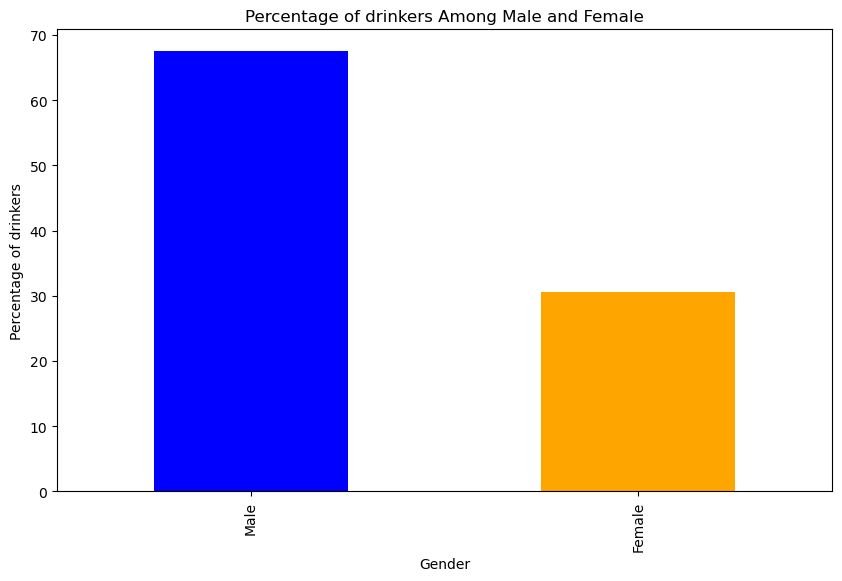

In [309]:

# Calculating the percentage of drinkers within each gender group
drinker_percentage = (drinker_counts / total_gender_counts) * 100

# Printing the percentages
print(f"Percentage of male drinkers: {drinker_percentage['Male']:.2f}%")
print(f"Percentage of female drinkers: {drinker_percentage['Female']:.2f}%")

# Plotting the bar plot for percentage distribution
plt.figure(figsize=(10, 6))
drinker_percentage.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of drinkers')
plt.title('Percentage of drinkers Among Male and Female')

In [ ]:
# drinker and cholestrol 

1736.0


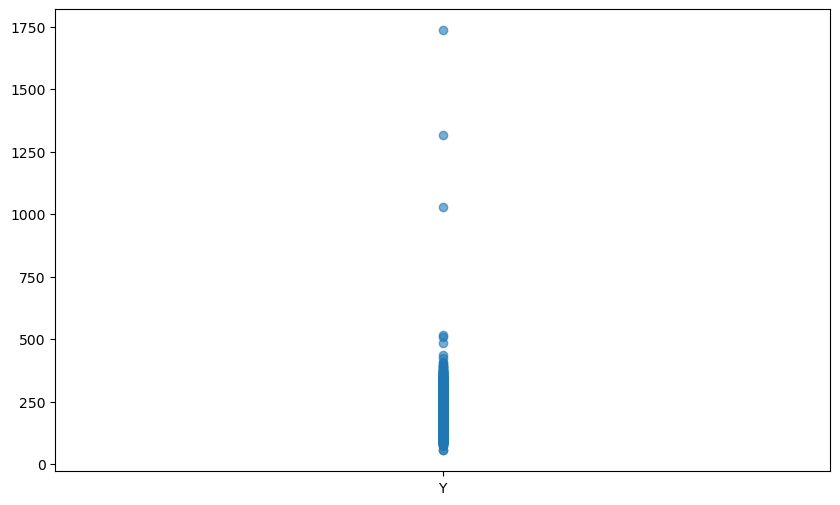

In [314]:
# distribution of people who drink and their cholestrol distribution level
drinker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']
print(drinker_cholestrol['tot_chole'].max())
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(drinker_cholestrol['DRK_YN'], drinker_cholestrol['tot_chole'], alpha=0.6)


2046.0


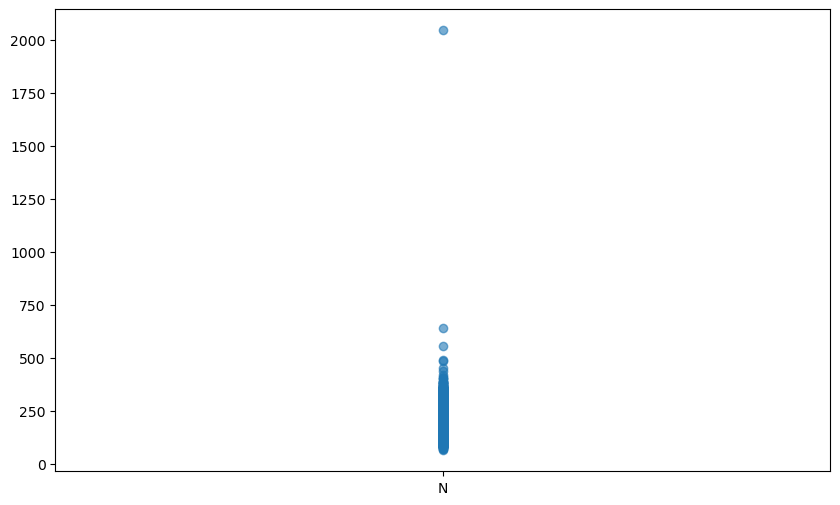

In [316]:
# distribution of people who dont drink and their cholestrol distribution level
non_drinker_cholestrol = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']
print(non_drinker_cholestrol['tot_chole'].max())
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_drinker_cholestrol['DRK_YN'], non_drinker_cholestrol['tot_chole'], alpha=0.6)


chole_category
50-80          16
80-110        539
110-140      5529
140-170     19887
170-200     31860
200-230     25264
230-260     11931
260-290      3735
290-320       760
320-2050      479
Name: count, dtype: int64


<Axes: xlabel='chole_category'>

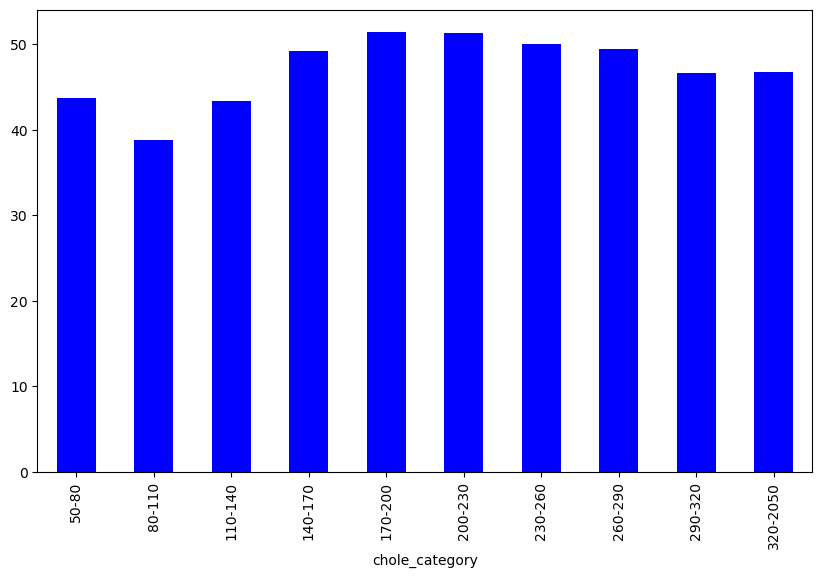

In [318]:
# Define age categories
bins = [50, 80, 110, 140, 170, 200, 230, 260, 290, 310, 2046]
labels = ['50-80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-290', '290-320', '320-2050']
sample_df_no_feature_engg['chole_category'] = pd.cut(sample_df_no_feature_engg['tot_chole'], bins=bins, labels=labels)

# Total number of people in each age category
total_counts = sample_df_no_feature_engg['chole_category'].value_counts(sort=False)
print(total_counts)
# Number of smokers in each age category
drinker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['chole_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each age category
percentage_drinker_chole = (drinker_counts_chole / total_counts) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
percentage_drinker_chole.plot(kind='bar', color='blue')

chole_category
50-80          16
80-110        539
110-140      5529
140-170     19887
170-200     31860
200-230     25264
230-260     11931
260-290      3735
290-320       760
320-2050      479
Name: count, dtype: int64


<Axes: xlabel='chole_category'>

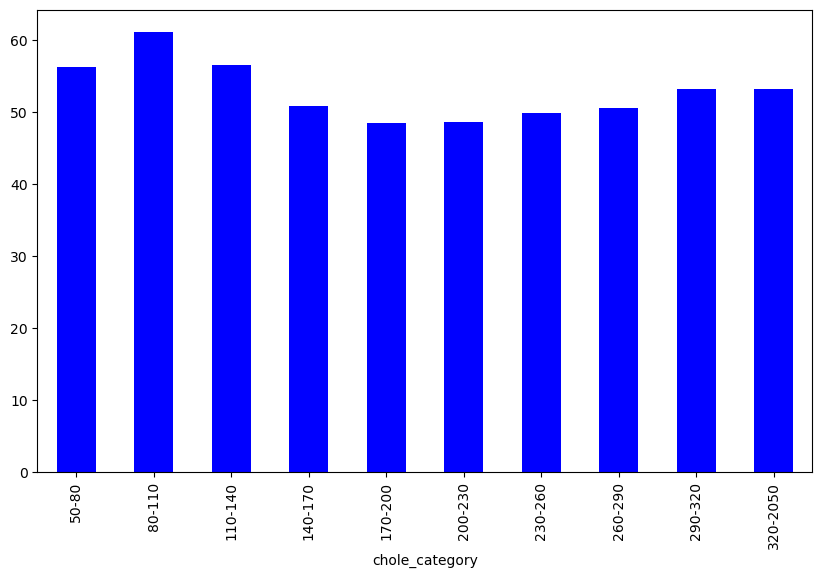

In [320]:
# Define age categories
bins = [50, 80, 110, 140, 170, 200, 230, 260, 290, 310, 2046]
labels = ['50-80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-290', '290-320', '320-2050']
sample_df_no_feature_engg['chole_category'] = pd.cut(sample_df_no_feature_engg['tot_chole'], bins=bins, labels=labels)

# Total number of people in each age category
total_counts = sample_df_no_feature_engg['chole_category'].value_counts(sort=False)
print(total_counts)
# Number of smokers in each age category
non_drinker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['chole_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each age category
percentage_non_drinker_chole = (non_drinker_counts_chole / total_counts) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
percentage_non_drinker_chole.plot(kind='bar', color='blue')

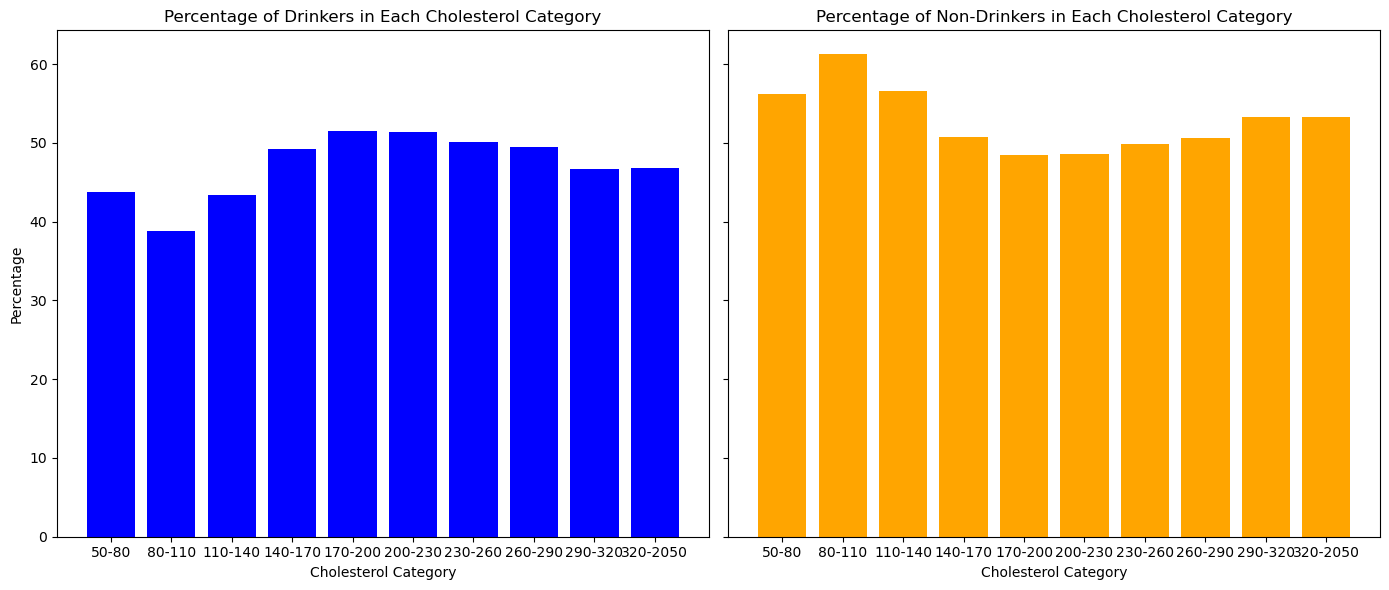

In [322]:
# Define age categories
bins = [50, 80, 110, 140, 170, 200, 230, 260, 290, 310, 2046]
labels = ['50-80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-290', '290-320', '320-2050']
sample_df_no_feature_engg['chole_category'] = pd.cut(sample_df_no_feature_engg['tot_chole'], bins=bins, labels=labels)

# Total number of people in each cholesterol category
total_counts = sample_df_no_feature_engg['chole_category'].value_counts(sort=False)

# Number of drinkers in each cholesterol category
drinker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['chole_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each cholesterol category
percentage_drinker_chole = (drinker_counts_chole / total_counts) * 100

# Number of non-drinkers in each cholesterol category
non_drinker_counts_chole = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['chole_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each cholesterol category
percentage_non_drinker_chole = (non_drinker_counts_chole / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(percentage_drinker_chole.index, percentage_drinker_chole, color='blue')
axs[0].set_title('Percentage of Drinkers in Each Cholesterol Category')
axs[0].set_xlabel('Cholesterol Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(percentage_non_drinker_chole.index, percentage_non_drinker_chole, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each Cholesterol Category')
axs[1].set_xlabel('Cholesterol Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [328]:
# drinker and protein values

In [ ]:
sample_df_no_feature_engg['DRK_YN'] == 'Y' 
Y    50190
N    49810

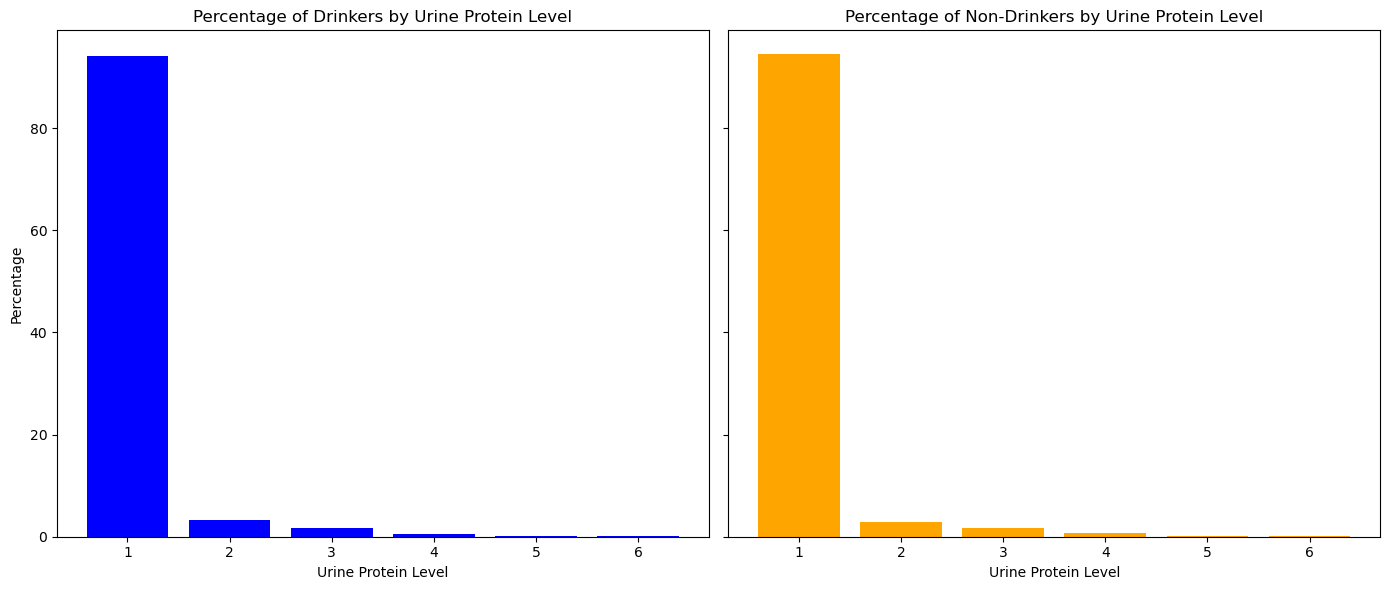

In [330]:
# Counting drinkers by protein level
drinker_counts_protein = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['urine_protein'].value_counts()
drinker_counts_protein_percentage = (drinker_counts_protein / 50190) * 100

# Counting non-drinkers by protein level
non_drinker_counts_protein = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['urine_protein'].value_counts()
non_drinker_counts_protein_percentage = (non_drinker_counts_protein / 49810) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the percentage for drinkers
axs[0].bar(drinker_counts_protein_percentage.index, drinker_counts_protein_percentage, color='blue')
axs[0].set_title('Percentage of Drinkers by Urine Protein Level')
axs[0].set_xlabel('Urine Protein Level')
axs[0].set_ylabel('Percentage')

# Plotting the percentage for non-drinkers
axs[1].bar(non_drinker_counts_protein_percentage.index, non_drinker_counts_protein_percentage, color='orange')
axs[1].set_title('Percentage of Non-Drinkers by Urine Protein Level')
axs[1].set_xlabel('Urine Protein Level')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [338]:
# age and drinkers

age_category
20-29    14420
30-39    21686
40-49    25079
50-59    21937
60-69    10228
70-79     4056
Name: count, dtype: int64


<Axes: xlabel='age_category'>

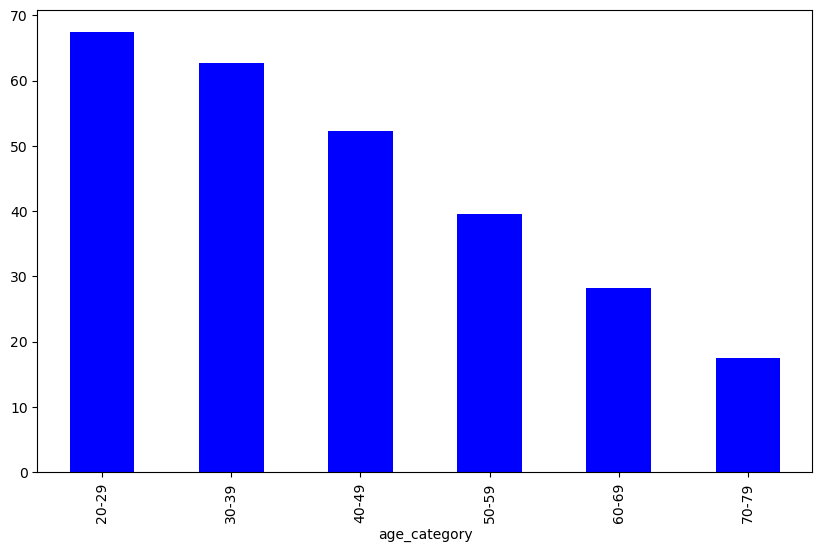

In [340]:
# Define age categories
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
sample_df_no_feature_engg['age_category'] = pd.cut(sample_df_no_feature_engg['age'], bins=bins, labels=labels)

# Total number of people in each age category
total_counts = sample_df_no_feature_engg['age_category'].value_counts(sort=False)
print(total_counts)
# Number of smokers in each age category
drinker_counts = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y' ]['age_category'].value_counts(sort=False)

# Calculating the percentage of smokers within each age category
percentage_drinkers = (drinker_counts / total_counts) * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
percentage_drinkers.plot(kind='bar', color='blue')

<Axes: xlabel='DRK_YN', ylabel='age'>

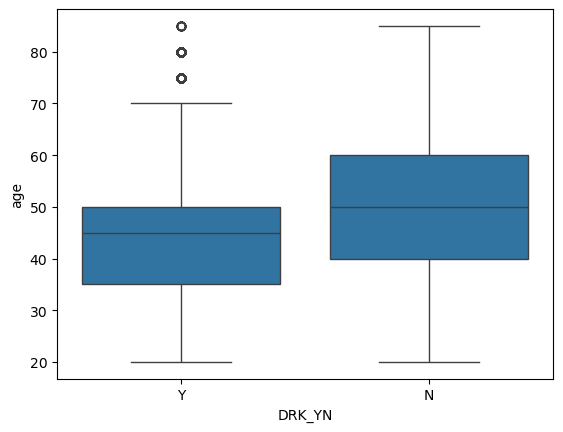

In [342]:
sns.boxplot(data =sample_df_no_feature_engg, x =sample_df_no_feature_engg['DRK_YN'] , y ='age'  )

In [346]:
# sbp and drinkers relation

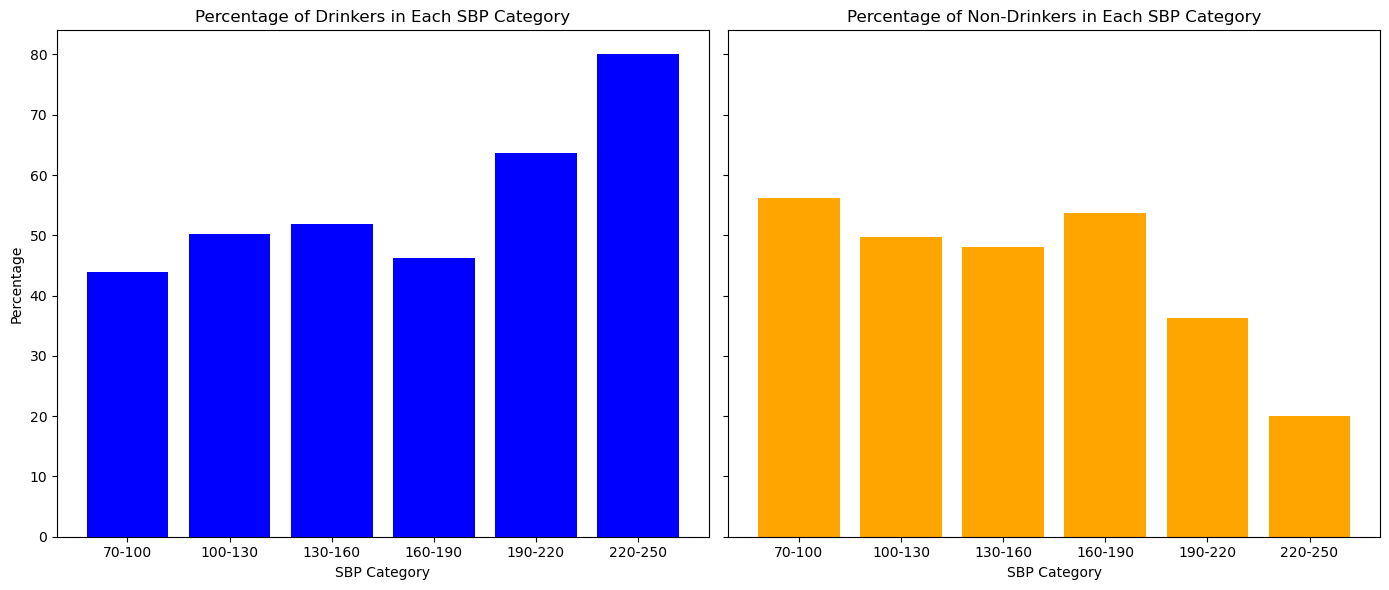

In [350]:
# Define SBP categories
bins = [70, 100, 130, 160, 190, 220, 250]
labels = ['70-100', '100-130', '130-160', '160-190', '190-220', '220-250']
sample_df_no_feature_engg['SBP_category'] = pd.cut(sample_df_no_feature_engg['SBP'], bins=bins, labels=labels)

# Total number of people in each SBP category
total_counts = sample_df_no_feature_engg['SBP_category'].value_counts(sort=False)

# Number of drinkers in each SBP category
drinker_counts_sbp = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y' ]['SBP_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each SBP category
drinker_percentage_sbp = (drinker_counts_sbp / total_counts) * 100

# Number of non-drinkers in each SBP category
non_drinker_counts_sbp = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N' ]['SBP_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each SBP category
non_drinker_percentage_sbp = (non_drinker_counts_sbp / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_sbp.index, drinker_percentage_sbp, color='blue')
axs[0].set_title('Percentage of Drinkers in Each SBP Category')
axs[0].set_xlabel('SBP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_sbp.index, non_drinker_percentage_sbp, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each SBP Category')
axs[1].set_xlabel('SBP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [352]:
# dbp and drinkers

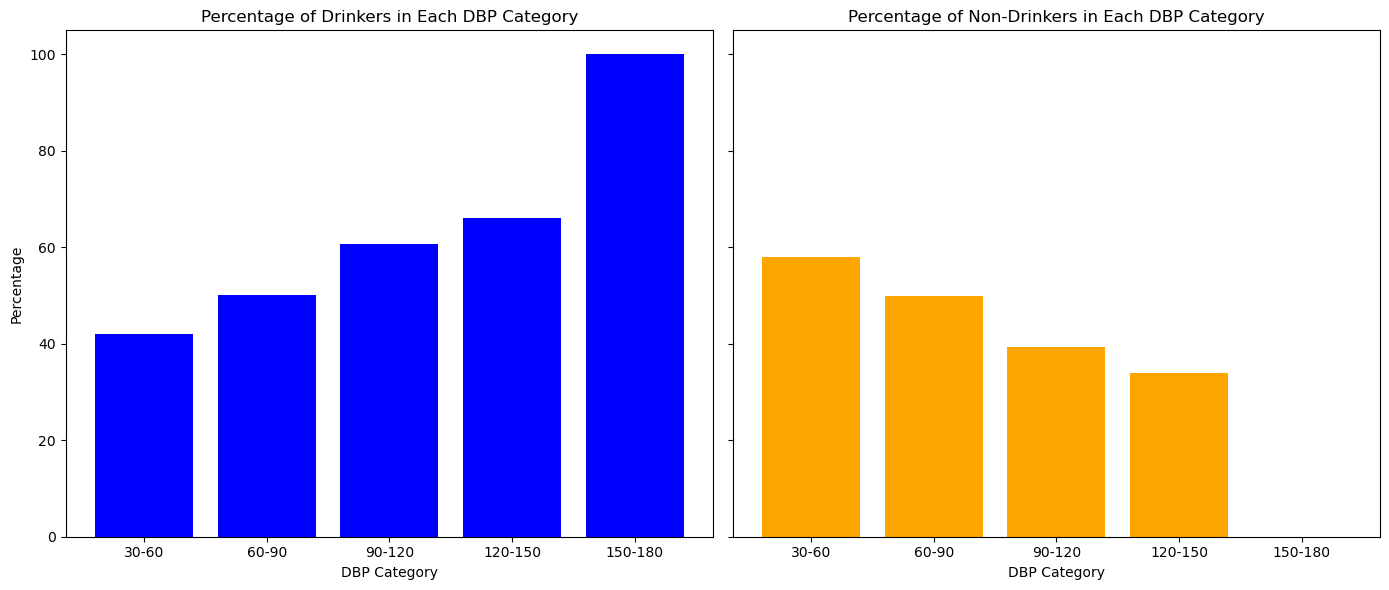

In [358]:
# Define DBP categories
bins = [30, 60, 90, 120, 150, 180]
labels = ['30-60', '60-90', '90-120', '120-150', '150-180']
sample_df_no_feature_engg['DBP_category'] = pd.cut(sample_df_no_feature_engg['DBP'], bins=bins, labels=labels)

# Total number of people in each DBP category
total_counts = sample_df_no_feature_engg['DBP_category'].value_counts(sort=False)

# Number of drinkers in each DBP category
drinker_counts_dbp = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['DBP_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each DBP category
drinker_percentage_dbp = (drinker_counts_dbp / total_counts) * 100

# Number of non-drinkers in each DBP category
non_drinker_counts_dbp = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['DBP_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each DBP category
non_drinker_percentage_dbp = (non_drinker_counts_dbp / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_dbp.index, drinker_percentage_dbp, color='blue')
axs[0].set_title('Percentage of Drinkers in Each DBP Category')
axs[0].set_xlabel('DBP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_dbp.index, non_drinker_percentage_dbp, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each DBP Category')
axs[1].set_xlabel('DBP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [360]:
# HDL AND DRINKERS 

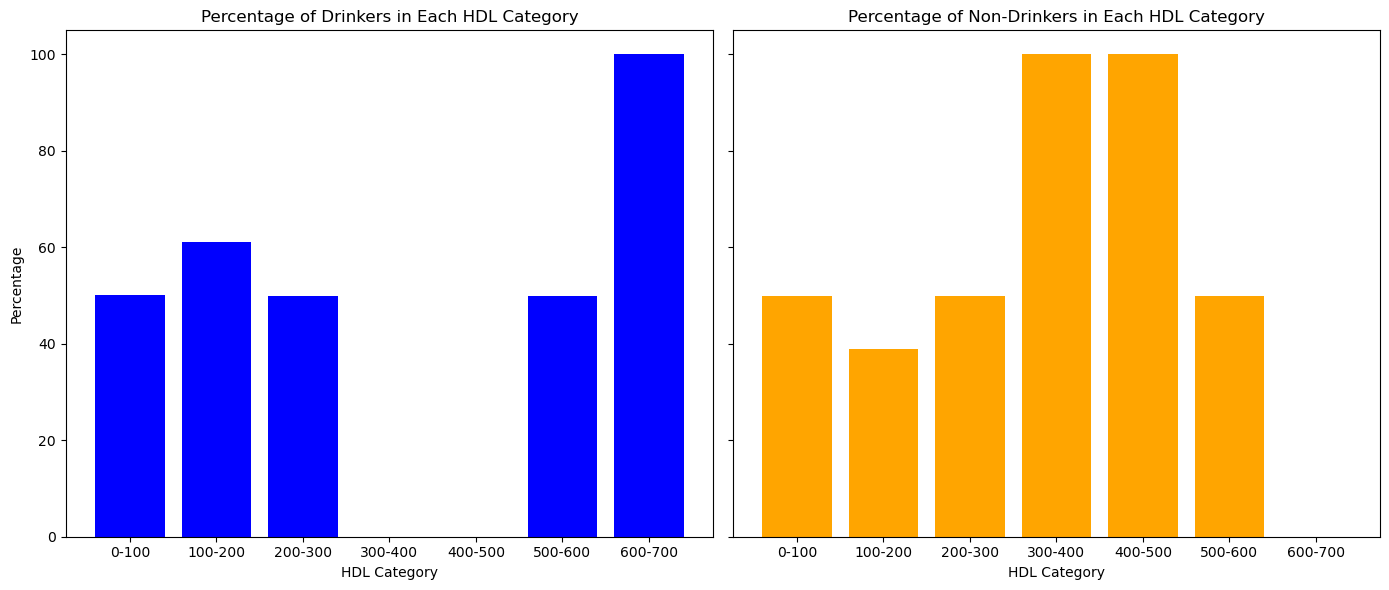

In [366]:
# Define HDL cholesterol categories
bins = [0, 100, 200, 300, 400, 500, 600, 700]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700']
sample_df_no_feature_engg['HDL_category'] = pd.cut(sample_df_no_feature_engg['HDL_chole'], bins=bins, labels=labels)

# Total number of people in each HDL category
total_counts = sample_df_no_feature_engg['HDL_category'].value_counts(sort=False)

# Number of drinkers in each HDL category
drinker_counts_hdl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['HDL_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each HDL category
drinker_percentage_hdl = (drinker_counts_hdl / total_counts) * 100

# Number of non-drinkers in each HDL category
non_drinker_counts_hdl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['HDL_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each HDL category
non_drinker_percentage_hdl = (non_drinker_counts_hdl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_hdl.index, drinker_percentage_hdl, color='blue')
axs[0].set_title('Percentage of Drinkers in Each HDL Category')
axs[0].set_xlabel('HDL Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_hdl.index, non_drinker_percentage_hdl, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each HDL Category')
axs[1].set_xlabel('HDL Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [364]:
# ldl drinker

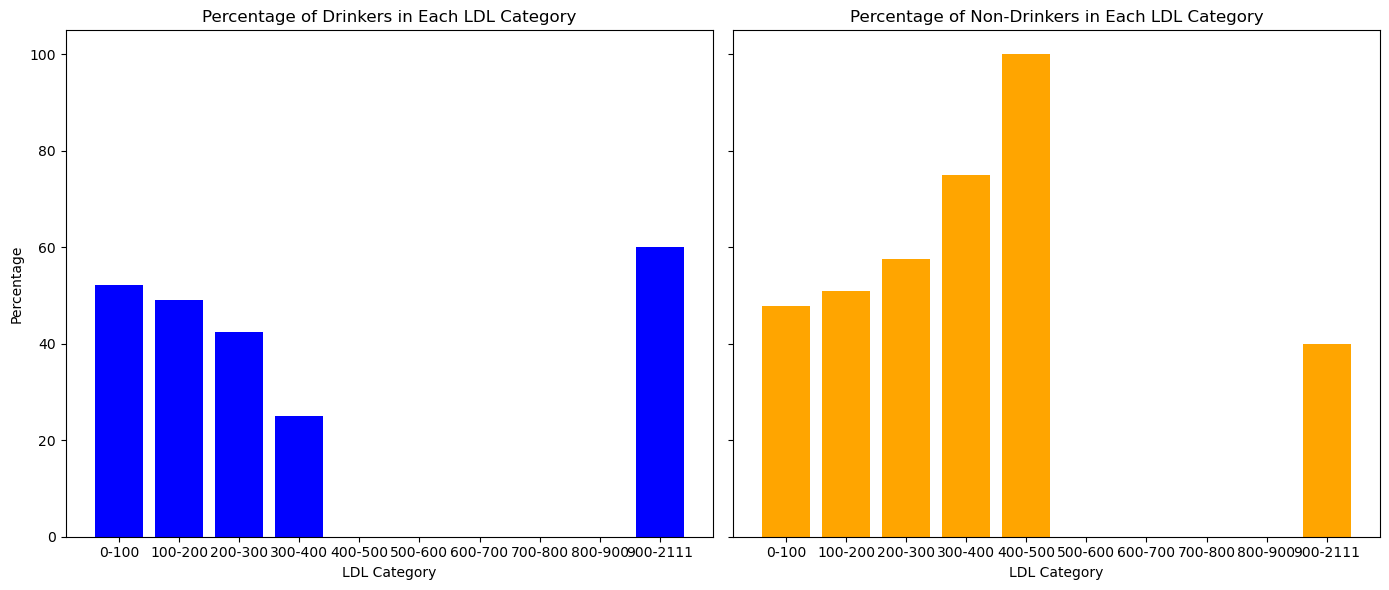

In [372]:
# Define LDL cholesterol categories
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 2111]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-2111']
sample_df_no_feature_engg['LDL_category'] = pd.cut(sample_df_no_feature_engg['LDL_chole'], bins=bins, labels=labels)

# Total number of people in each LDL category
total_counts = sample_df_no_feature_engg['LDL_category'].value_counts(sort=False)

# Number of drinkers in each LDL category
drinker_counts_ldl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['LDL_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each LDL category
drinker_percentage_ldl = (drinker_counts_ldl / total_counts) * 100

# Number of non-drinkers in each LDL category
non_drinker_counts_ldl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['LDL_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each LDL category
non_drinker_percentage_ldl = (non_drinker_counts_ldl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_ldl.index, drinker_percentage_ldl, color='blue')
axs[0].set_title('Percentage of Drinkers in Each LDL Category')
axs[0].set_xlabel('LDL Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_ldl.index, non_drinker_percentage_ldl, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each LDL Category')
axs[1].set_xlabel('LDL Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [370]:
# triglyceride and drinker

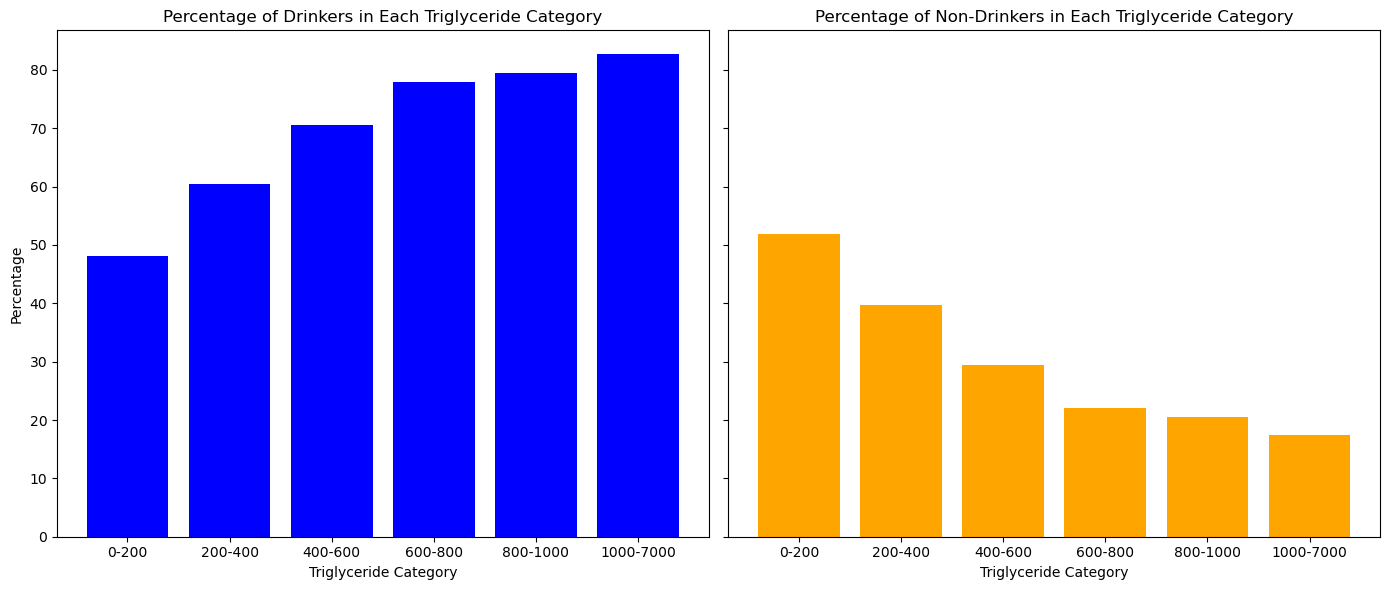

In [382]:
# Define triglyceride categories
bins = [0, 200, 400, 600, 800, 1000, 7000]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-7000']
sample_df_no_feature_engg['tgl_category'] = pd.cut(sample_df_no_feature_engg['triglyceride'], bins=bins, labels=labels)

# Total number of people in each triglyceride category
total_counts = sample_df_no_feature_engg['tgl_category'].value_counts(sort=False)

# Number of drinkers in each triglyceride category
drinker_counts_tgl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['tgl_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each triglyceride category
drinker_percentage_tgl = (drinker_counts_tgl / total_counts) * 100

# Number of non-drinkers in each triglyceride category
non_drinker_counts_tgl = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['tgl_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each triglyceride category
non_drinker_percentage_tgl = (non_drinker_counts_tgl / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_tgl.index, drinker_percentage_tgl, color='blue')
axs[0].set_title('Percentage of Drinkers in Each Triglyceride Category')
axs[0].set_xlabel('Triglyceride Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_tgl.index, non_drinker_percentage_tgl, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each Triglyceride Category')
axs[1].set_xlabel('Triglyceride Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [380]:
# gamma gto and drinker

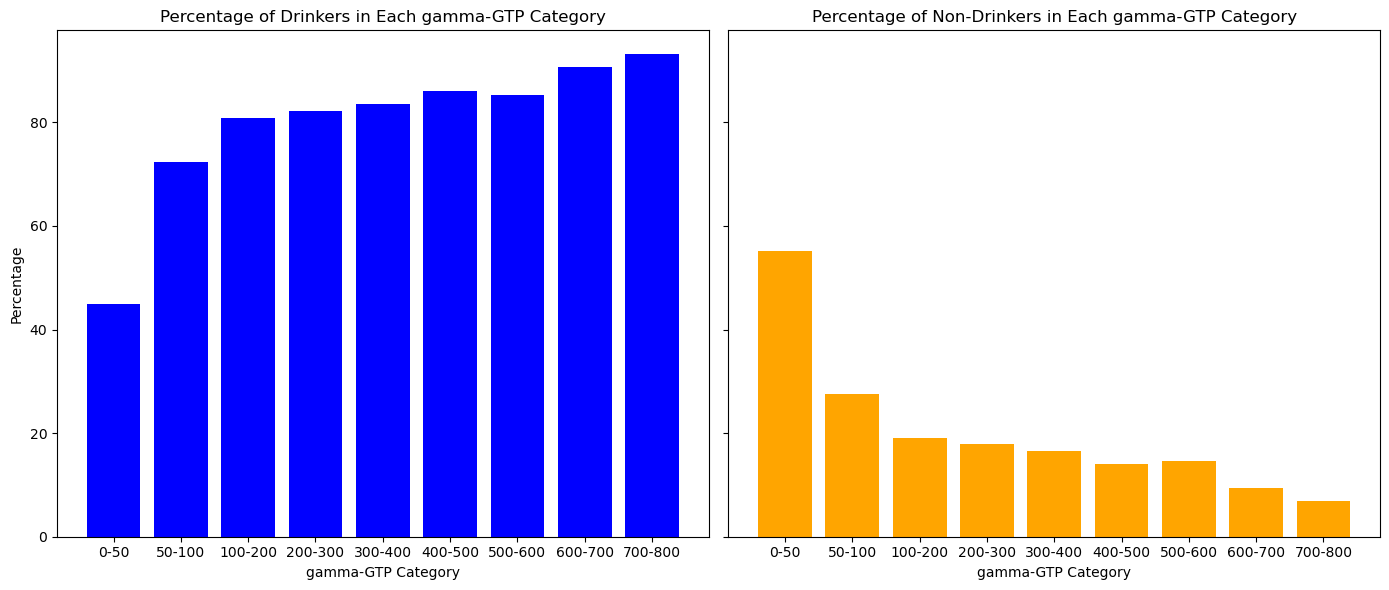

In [12]:
# Define gamma-GTP categories, excluding the overlapping 800-900 and 900-1000 categories
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800']
sample_df_no_feature_engg['gamma_GTP_category'] = pd.cut(sample_df_no_feature_engg['gamma_GTP'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df_no_feature_engg['gamma_GTP_category'].value_counts(sort=False)

# Number of drinkers in each gamma-GTP category
drinker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each gamma-GTP category
drinker_percentage_gamma = (drinker_counts_gamma / total_counts) * 100

# Number of non-drinkers in each gamma-GTP category
non_drinker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each gamma-GTP category
non_drinker_percentage_gamma = (non_drinker_counts_gamma / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_gamma.index, drinker_percentage_gamma, color='blue')
axs[0].set_title('Percentage of Drinkers in Each gamma-GTP Category')
axs[0].set_xlabel('gamma-GTP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_gamma.index, non_drinker_percentage_gamma, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each gamma-GTP Category')
axs[1].set_xlabel('gamma-GTP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


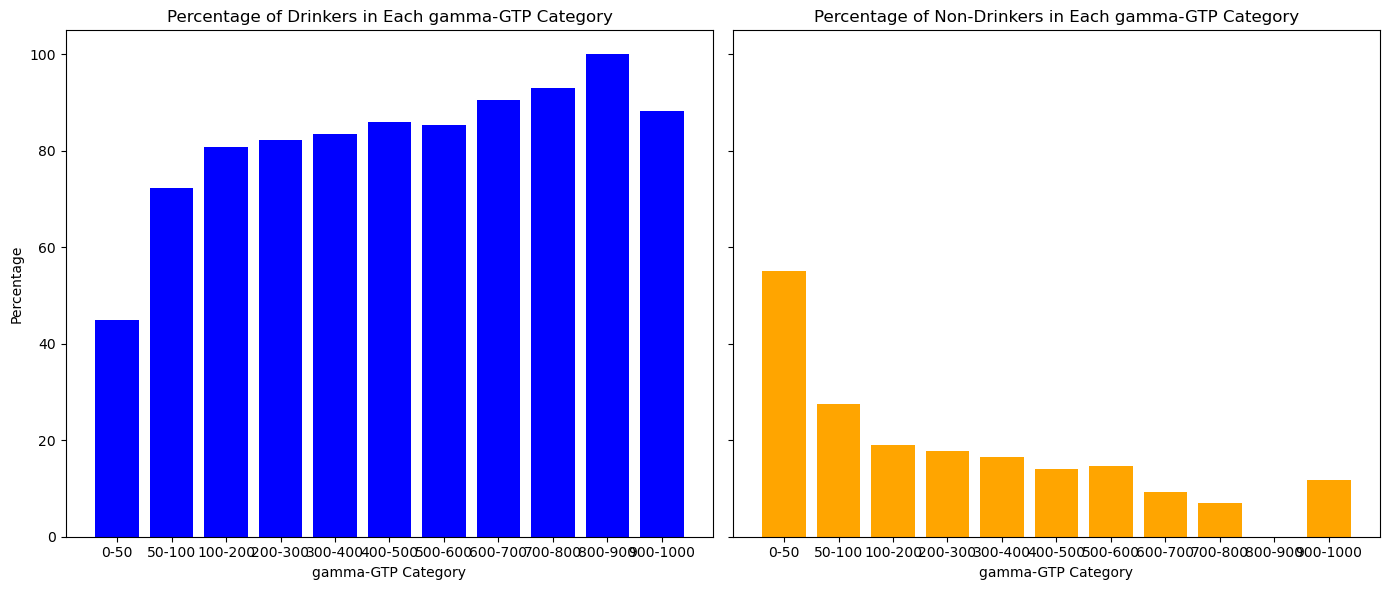

In [386]:
# Define gamma-GTP categories
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']
sample_df_no_feature_engg['gamma_GTP_category'] = pd.cut(sample_df_no_feature_engg['gamma_GTP'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df_no_feature_engg['gamma_GTP_category'].value_counts(sort=False)

# Number of drinkers in each gamma-GTP category
drinker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each gamma-GTP category
drinker_percentage_gamma = (drinker_counts_gamma / total_counts) * 100

# Number of non-drinkers in each gamma-GTP category
non_drinker_counts_gamma = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['gamma_GTP_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each gamma-GTP category
non_drinker_percentage_gamma = (non_drinker_counts_gamma / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_gamma.index, drinker_percentage_gamma, color='blue')
axs[0].set_title('Percentage of Drinkers in Each gamma-GTP Category')
axs[0].set_xlabel('gamma-GTP Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_gamma.index, non_drinker_percentage_gamma, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each gamma-GTP Category')
axs[1].set_xlabel('gamma-GTP Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [1]:
# hemoglobin AND DRINKING

In [9]:
print(sample_df_no_feature_engg['hemoglobin'].max())
print(sample_df_no_feature_engg['hemoglobin'].min())

22.7
3.9


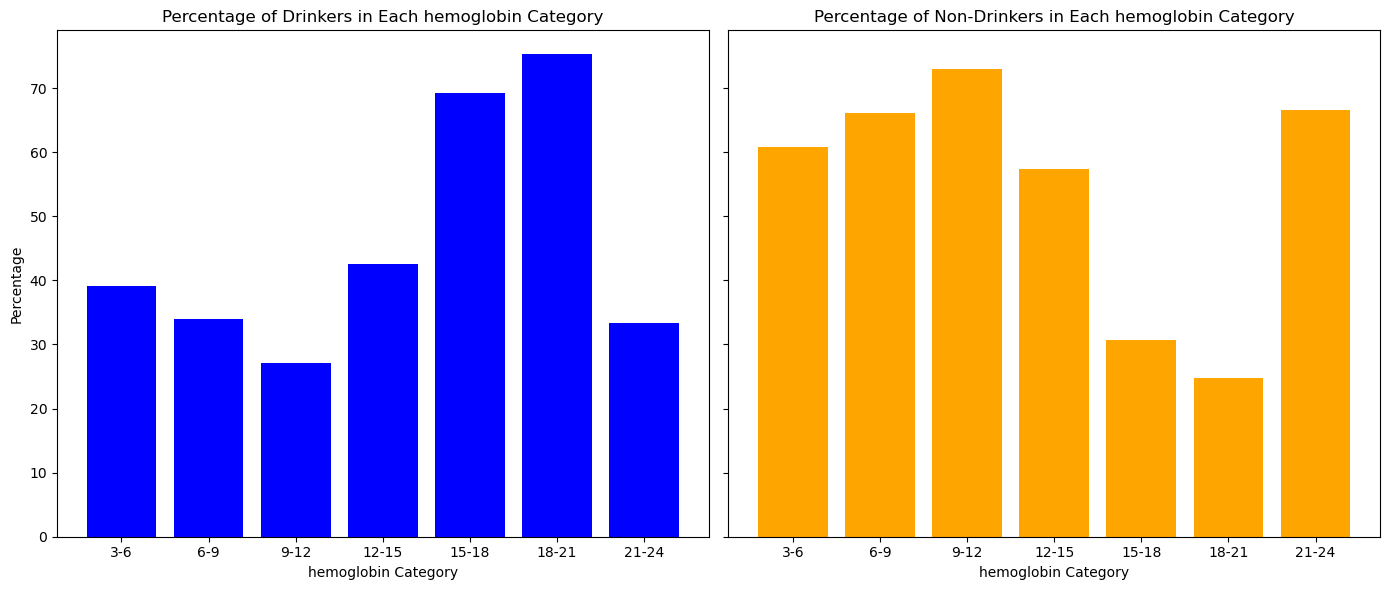

In [11]:
# Define gamma-GTP categories
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
sample_df_no_feature_engg['hemoglobin_category'] = pd.cut(sample_df_no_feature_engg['hemoglobin'], bins=bins, labels=labels)

# Total number of people in each gamma-GTP category
total_counts = sample_df_no_feature_engg['hemoglobin_category'].value_counts(sort=False)

# Number of drinkers in each gamma-GTP category
drinker_counts_hemo = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'Y']['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of drinkers within each gamma-GTP category
drinker_percentage_hemo = (drinker_counts_hemo / total_counts) * 100

# Number of non-drinkers in each gamma-GTP category
non_drinker_counts_hemo = sample_df_no_feature_engg[sample_df_no_feature_engg['DRK_YN'] == 'N']['hemoglobin_category'].value_counts(sort=False)

# Calculating the percentage of non-drinkers within each gamma-GTP category
non_drinker_percentage_hemo = (non_drinker_counts_hemo / total_counts) * 100

# Plotting the bar plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plotting the drinker percentages
axs[0].bar(drinker_percentage_hemo.index, drinker_percentage_hemo, color='blue')
axs[0].set_title('Percentage of Drinkers in Each hemoglobin Category')
axs[0].set_xlabel('hemoglobin Category')
axs[0].set_ylabel('Percentage')

# Plotting the non-drinker percentages
axs[1].bar(non_drinker_percentage_hemo.index, non_drinker_percentage_hemo, color='orange')
axs[1].set_title('Percentage of Non-Drinkers in Each hemoglobin Category')
axs[1].set_xlabel('hemoglobin Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()